# EDA

- EDA stands for Exploratory Data Analysis
- It's a method of analyzing and summarizing data sets before making any assumptions or sometimes performing data cleansing.
- It helps identify patterns, spot anomalies, inspect data quality, test hypotheses, and check assumptions
- It's a very important step in the DS/ML pipeline because it provides a better understanding of the data and its charecteristics
- EDA Techniques:
    - **Descriptive Statistics** 
        - Measures of Central Tendency: e.g. mean, median, mode
        - Measures of Dispersion: e.g. Standards Deviation
        - Measures of Shape: e.g. skewness
        - Correlation
    - **Non-Graphical Analysis** Data aggregation
        - Checking for missing values
        - Checking for outliers
        - Checking of the data
        - Aggregation:
            - `pivot()`
            - `groupby()`
            - `agg()`
            - `crosstab()`
    - **- Graphical Analysis (Data Visualization)** Example: (using `pandas`,`matplotlib`, `seaborn`, `plotly`)
        - Histograms
        - Line graphs
        - Box and Whisker
        - Heatmaps
        - Scatterplots
        - Pie chart


## Descriptive Statistics

In [154]:
import pandas as pd
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/HousePrices.csv')
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [155]:
df.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

**Observation**
- 75% of the houses are below 650,000 (or 6.549625e+05	)
- Avg sqft of living is 2139 and min is 370
- Avg bedrooms = 3
- min price is 0 could be missing information, we may need to remove it
- Waterfront seems to be a categorical column, so we cannot do much statistical analysis on it
- stddev could be high, need to inspect the distribution
- Min price is 0. We may have missing values (it doesn't make sense houses sold for $0)
- sqft_basement has zeroes. Maybe it's not missing information. It could be an indicator that the house has no basement.
- All columns have the same number as the length(row count) of the data. This means, we don't have `Nan`
- most of the houses were build prior to 1997.
- Square feet of living space varies widely, but square feet of lot space varies even more widely (based on standard deviation)
- The median (50th perc) is $460K and the mean is $550K. Therefore, the distribution is positively skewed.
- House built year ranges from 1900 to 2014

In [156]:
df['price'].skew()

24.790932561757053

## Other Non-graphical EDA

In [157]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [158]:
# check the average of price, bedroom, sqft_living, floors
df.groupby(['city'])[['price', 'bedrooms','sqft_living', 'floors']].mean()

price  bedrooms  sqft_living    floors
city                                                              
Algona               2.072880e+05  3.200000  1608.600000  1.400000
Auburn               2.993404e+05  3.420455  2019.579545  1.448864
Beaux Arts Village   7.450000e+05  3.000000  1490.000000  1.000000
Bellevue             8.471807e+05  3.804196  2694.527972  1.398601
Black Diamond        3.396056e+05  3.222222  1863.333333  1.388889
Bothell              4.814419e+05  3.606061  2319.393939  1.500000
Burien               3.489472e+05  3.337838  1815.337838  1.209459
Carnation            5.087520e+05  3.090909  2392.454545  1.522727
Clyde Hill           1.321945e+06  4.181818  3620.909091  1.181818
Covington            2.962304e+05  3.325581  1792.558140  1.348837
Des Moines           3.049925e+05  3.241379  1812.620690  1.250000
Duvall               4.039941e+05  3.380952  2161.547619  1.642857
Enumclaw             3.076146e+05  3.178571  1922.500000  1.303571
Fall City            6.926818e+05  3.818182  2865.909091  1.363636
Federal Way          2.898877e+05  3.500000  2054.114865  1.344595
Inglewood-Finn Hill  4.250000e+05  4.000000  1520.000000  1.000000
Issaquah             5.961637e+05  3.561497  2458.844920  1.799465
Kenmore              4.474940e+05  3.560606  2110.530303  1.484848
Kent                 4.394924e+05  3.459459  1981.270270  1.454054
Kirkland             6.515836e+05  3.540107  2259.481283  1.459893
Lake Forest Park     4.484750e+05  3.750000  2283.055556  1.250000
Maple Valley         3.364749e+05  3.489583  2086.041667  1.796875
Medina               2.046559e+06  4.090909  4103.636364  1.636364
Mercer Island        1.123818e+06  4.116279  3275.313953  1.598837
Milton               2.850000e+05  3.000000  1255.000000  1.000000
Newcastle            6.660467e+05  3.757576  2689.090909  1.727273
Normandy Park        5.067931e+05  3.444444  2093.277778  1.055556
North Bend           3.995657e+05  3.300000  1995.400000  1.570000
Pacific              2.252333e+05  3.333333  1520.833333  1.333333
Preston              5.624500e+05  2.500000  2280.000000  1.750000
Ravensdale           5.140714e+05  3.428571  2612.857143  1.714286
Redmond              6.676495e+05  3.421277  2491.761702  1.563830
Renton               3.770410e+05  3.481229  2114.761092  1.482935
Sammamish            6.869176e+05  3.725714  2830.120000  1.768571
SeaTac               2.452906e+05  3.275862  1678.517241  1.189655
Seattle              5.798375e+05  3.169739  1828.623649  1.530833
Shoreline            4.203924e+05  3.308943  1774.837398  1.219512
Skykomish            2.330000e+05  2.666667  1356.666667  1.666667
Snoqualmie           5.363053e+05  3.577465  2716.056338  1.873239
Snoqualmie Pass      5.250000e+05  3.000000  2100.000000  2.000000
Tukwila              3.082901e+05  3.068966  1706.206897  1.379310
Vashon               4.725569e+05  2.758621  1889.689655  1.517241
Woodinville          6.095650e+05  3.556522  2663.008696  1.547826
Yarrow Point         1.194838e+06  3.750000  2472.500000  2.000000

In [159]:
df.pivot_table(df[['price', 'bedrooms', 'sqft_living', 'floors']], index=['country','city']) 
# if you don't specify aggfunc, mean is used

bedrooms    floors         price  sqft_living
country city                                                              
USA     Algona               3.200000  1.400000  2.072880e+05  1608.600000
        Auburn               3.420455  1.448864  2.993404e+05  2019.579545
        Beaux Arts Village   3.000000  1.000000  7.450000e+05  1490.000000
        Bellevue             3.804196  1.398601  8.471807e+05  2694.527972
        Black Diamond        3.222222  1.388889  3.396056e+05  1863.333333
        Bothell              3.606061  1.500000  4.814419e+05  2319.393939
        Burien               3.337838  1.209459  3.489472e+05  1815.337838
        Carnation            3.090909  1.522727  5.087520e+05  2392.454545
        Clyde Hill           4.181818  1.181818  1.321945e+06  3620.909091
        Covington            3.325581  1.348837  2.962304e+05  1792.558140
        Des Moines           3.241379  1.250000  3.049925e+05  1812.620690
        Duvall               3.380952  1.642857  4.039941e+05  2161.547619
        Enumclaw             3.178571  1.303571  3.076146e+05  1922.500000
        Fall City            3.818182  1.363636  6.926818e+05  2865.909091
        Federal Way          3.500000  1.344595  2.898877e+05  2054.114865
        Inglewood-Finn Hill  4.000000  1.000000  4.250000e+05  1520.000000
        Issaquah             3.561497  1.799465  5.961637e+05  2458.844920
        Kenmore              3.560606  1.484848  4.474940e+05  2110.530303
        Kent                 3.459459  1.454054  4.394924e+05  1981.270270
        Kirkland             3.540107  1.459893  6.515836e+05  2259.481283
        Lake Forest Park     3.750000  1.250000  4.484750e+05  2283.055556
        Maple Valley         3.489583  1.796875  3.364749e+05  2086.041667
        Medina               4.090909  1.636364  2.046559e+06  4103.636364
        Mercer Island        4.116279  1.598837  1.123818e+06  3275.313953
        Milton               3.000000  1.000000  2.850000e+05  1255.000000
        Newcastle            3.757576  1.727273  6.660467e+05  2689.090909
        Normandy Park        3.444444  1.055556  5.067931e+05  2093.277778
        North Bend           3.300000  1.570000  3.995657e+05  1995.400000
        Pacific              3.333333  1.333333  2.252333e+05  1520.833333
        Preston              2.500000  1.750000  5.624500e+05  2280.000000
        Ravensdale           3.428571  1.714286  5.140714e+05  2612.857143
        Redmond              3.421277  1.563830  6.676495e+05  2491.761702
        Renton               3.481229  1.482935  3.770410e+05  2114.761092
        Sammamish            3.725714  1.768571  6.869176e+05  2830.120000
        SeaTac               3.275862  1.189655  2.452906e+05  1678.517241
        Seattle              3.169739  1.530833  5.798375e+05  1828.623649
        Shoreline            3.308943  1.219512  4.203924e+05  1774.837398
        Skykomish            2.666667  1.666667  2.330000e+05  1356.666667
        Snoqualmie           3.577465  1.873239  5.363053e+05  2716.056338
        Snoqualmie Pass      3.000000  2.000000  5.250000e+05  2100.000000
        Tukwila              3.068966  1.379310  3.082901e+05  1706.206897
        Vashon               2.758621  1.517241  4.725569e+05  1889.689655
        Woodinville          3.556522  1.547826  6.095650e+05  2663.008696
        Yarrow Point         3.750000  2.000000  1.194838e+06  2472.500000

normalize and build a new metric

In [160]:
df['price_per_sqrft'] = df['price']/df['sqft_living']
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  \
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA   
1             0           709 W Blaine St    Seattle  WA 98119     USA   
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA   
3             0           857 170th Pl NE   Bellevue  WA 98008     USA   
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA   

   price_per_sqrft  
0       233.582090  
1       653.150685  
2       177.202073  
3       210.000000  
4       283.505155

In [161]:
# derive the state from the statezip column
df['state'] = df['statezip'].str[:2]
df.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  \
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA   
1             0           709 W Blaine St    Seattle  WA 98119     USA   
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA   
3             0           857 170th Pl NE   Bellevue  WA 98008     USA   
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA   

   price_per_sqrft state  
0       233.582090    WA  
1       653.150685    WA  
2       177.202073    WA  
3       210.000000    WA  
4       283.505155    WA

In [162]:
df.pivot_table(df[['price', 'bedrooms', 'sqft_living', 'floors']], index=['state','city']).style.format("{:.2f}")

> NOTE: to use styles, `pip install jina2`

In [163]:
## aggregate with multiple categorical columns with multiple statistical measures
df.groupby(['city','yr_built'])['price'].agg(['mean', 'median', 'max'])

mean     median        max
city         yr_built                                 
Algona       1956       100000.0   100000.0   100000.0
             1960       230000.0   230000.0   230000.0
             1992       196440.0   196440.0   196440.0
             2002       262000.0   262000.0   262000.0
             2006       248000.0   248000.0   248000.0
...                          ...        ...        ...
Woodinville  2013       646212.5   646212.5   646212.5
Yarrow Point 1949       899000.0   899000.0   899000.0
             1953        84350.0    84350.0    84350.0
             1969      1895000.0  1895000.0  1895000.0
             1992      1901000.0  1901000.0  1901000.0

[1300 rows x 3 columns]

In [164]:
df_over_avg = df[df['price']>df['price'].mean()]
df_over_avg.head()

date      price  bedrooms  bathrooms  sqft_living  \
1   2014-05-02 00:00:00  2384000.0       5.0       2.50         3650   
9   2014-05-02 00:00:00   640000.0       4.0       2.00         1520   
11  2014-05-02 00:00:00  1400000.0       4.0       2.50         2920   
12  2014-05-02 00:00:00   588500.0       3.0       1.75         2330   
14  2014-05-02 00:00:00  1200000.0       5.0       2.75         2910   

    sqft_lot  floors  waterfront  view  condition  sqft_above  sqft_basement  \
1       9050     2.0           0     4          5        3370            280   
9       6200     1.5           0     0          3        1520              0   
11      4000     1.5           0     0          5        1910           1010   
12     14892     1.0           0     0          3        1970            360   
14      9480     1.5           0     0          3        2910              0   

    yr_built  yr_renovated                 street       city  statezip  \
1       1921             0        709 W Blaine St    Seattle  WA 98119   
9       1945          2010       6811 55th Ave NE    Seattle  WA 98115   
11      1909          1988  3838-4098 44th Ave NE    Seattle  WA 98105   
12      1980             0       1833 220th Pl NE  Sammamish  WA 98074   
14      1939          1969       3534 46th Ave NE    Seattle  WA 98105   

   country  price_per_sqrft state  
1      USA       653.150685    WA  
9      USA       421.052632    WA  
11     USA       479.452055    WA  
12     USA       252.575107    WA  
14     USA       412.371134    WA

In [165]:
# have different function for each numerical column
df_over_avg.groupby(['city','yr_built'])[['price','bedrooms','floors']].agg({'price':'mean', 
                                                                            'bedrooms':'median', 
                                                                            'floors':'max'})

price  bedrooms  floors
city         yr_built                             
Auburn       1978       625000.0       3.0     1.0
             1986       560000.0       3.0     1.0
             1993       799950.0       4.0     2.0
             2000       900000.0       3.0     1.5
             2002       696225.0       4.0     2.0
...                          ...       ...     ...
Woodinville  2004       559900.0       3.0     1.0
             2013       646212.5       4.0     2.0
Yarrow Point 1949       899000.0       3.0     2.0
             1969      1895000.0       5.0     2.0
             1992      1901000.0       3.0     2.0

[597 rows x 3 columns]

## Data Visualization

![choosing the right chart](https://www.labnol.org/images/2008/data-chart-type.png)

- Foundational: `matplotlib`
- Advanced:
    - `seaborn` (statistical analysis visualization)
    - `plotly` (interactive and similar to graphing software like Tableau)
    - `bokeh` (some interactivity with statistical analysis)

Python offers a wide range of visualization libraries, each with its own strengths and weaknesses. Below is a comparison of some of the most popular Python visualization libraries:

### Summary Table

| Library       | Strengths                                      | Weaknesses                                   | Best Use Cases                              |
|---------------|------------------------------------------------|---------------------------------------------|---------------------------------------------|
| **Matplotlib**| Highly customizable, extensive support         | Verbose syntax, less user-friendly          | Publication-quality, custom visualizations |
| **Seaborn**   | Beautiful defaults, great for stats            | Less flexible, limited to stats             | Statistical visualizations                  |
| **Plotly**    | Highly interactive, great for web              | Slower for large datasets                   | Interactive web-based visualizations        |
| **Pandas**    | Easy to use, integrated with DataFrames        | Limited customization                       | Quick EDA, simple visualizations            |
| **Bokeh**     | Highly interactive, good for real-time data    | Steeper learning curve                      | Interactive web apps, real-time data        |
| **Altair**    | Simple syntax, great for quick visualizations  | Less flexible, limited interactivity        | Quick, declarative visualizations           |
| **ggplot**    | Familiar to R users, good for layered plots    | Limited community support                   | Layered, complex visualizations             |
| **Pygal**     | Produces SVG, good for web                     | Limited interactivity                       | Web-based visualizations                    |
| **Geoplotlib**| Specialized for geospatial data                | Limited to geospatial                       | Geospatial data visualization               |
| **Folium**    | Easy to create interactive maps                | Limited to maps, requires internet          | Interactive map visualizations              |

Each library has its own niche and is suited to different types of tasks. The choice of library depends on the specific requirements of your project, such as the need for interactivity, the type of data, and the level of customization required.

### Plotting Basics

`pip install matplotlib`

In [166]:
import matplotlib.pyplot as plt
import numpy as np

List of color names in `matplotlib` https://matplotlib.org/stable/gallery/color/named_colors.html

#### Line Plots

In [167]:
#generate data
x = np.linspace(0, 10, 100) # gives an array ranged between 0 and 10 with 100 divisions
y = np.sin(x)

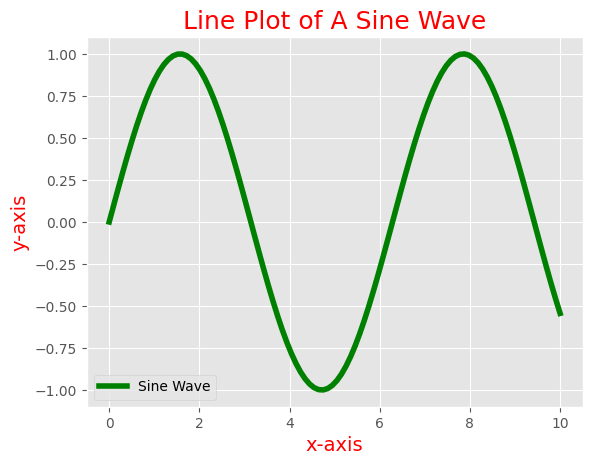

In [168]:
#create a lineplot using plot function
plt.plot(x, y, label='Sine Wave', color='green', linewidth=4)

#formatting the plot area
plt.xlabel('x-axis', fontsize=14, color='red')
plt.ylabel('y-axis', fontsize=14, color='red')
plt.title('Line Plot of A Sine Wave', fontsize=18, color='red')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


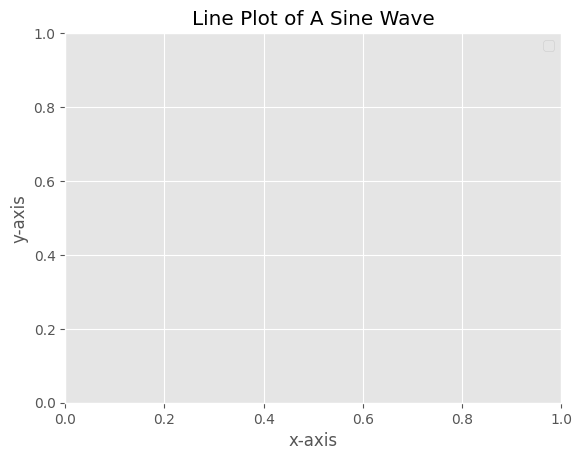

In [169]:
#formatting the plot area
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Line Plot of A Sine Wave')
plt.legend()

`matplotlib` theme styles

For the theme, you only need to run the line once. It will set the theme for all subsequent visuals.

In [170]:
plt.style.use('ggplot') #run once

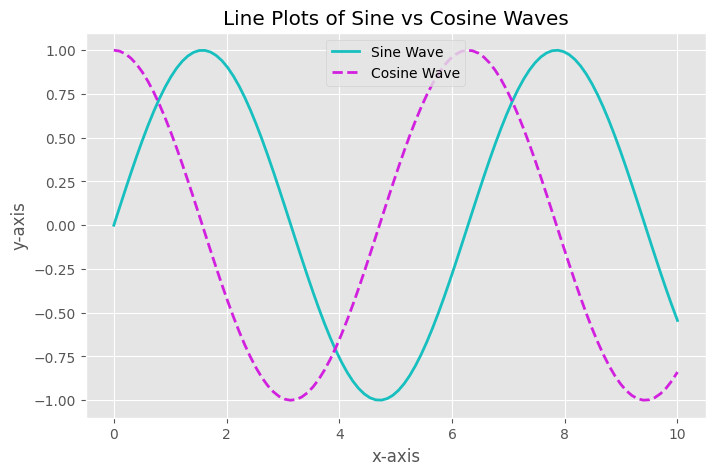

In [171]:
#generate data
x = np.linspace(0, 10, 100) # gives an array ranged between 0 and 10 with 100 divisions
y1 = np.sin(x)
y2 = np.cos(x)

#size of the plot - it has to be the first statement before plot function
plt.figure(figsize=(8,5))

#create a lineplot using plot function
plt.plot(x, y1, label='Sine Wave', color='#17BFBF', linewidth=2)
plt.plot(x, y2, label='Cosine Wave', color='#d121de', linewidth=2, linestyle='--')

#formatting the plot area
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Line Plots of Sine vs Cosine Waves')
plt.legend(loc='upper center')
plt.grid(True)

Annotation

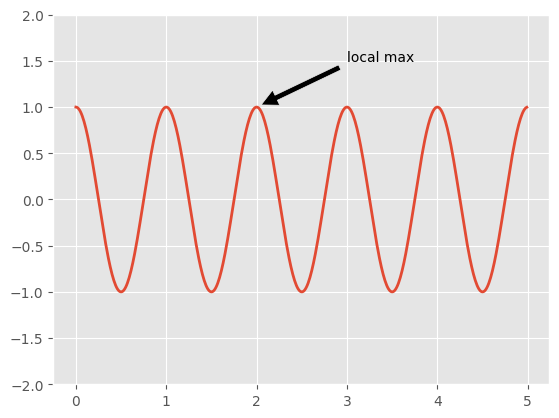

In [172]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
ax.set_ylim(-2, 2)
plt.show()

#### Bar Chart

<BarContainer object of 3 artists>

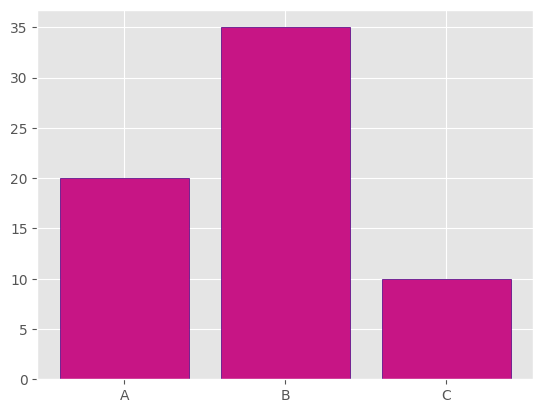

In [173]:
categories = ['A', 'B', 'C']
values = [20, 35, 10]

plt.bar(categories, values, color='mediumvioletred', edgecolor='indigo')

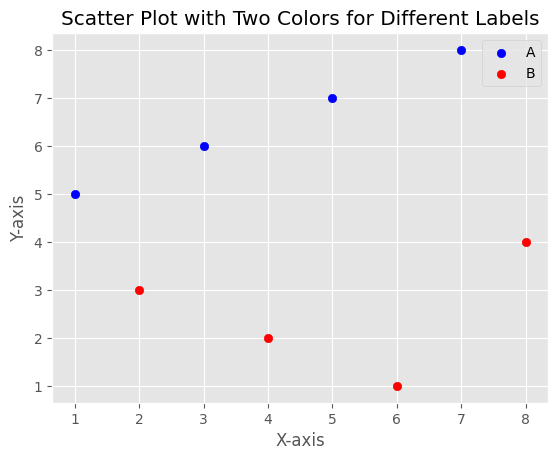

In [174]:
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4, 5, 6, 7, 8]
y = [5, 3, 6, 2, 7, 1, 8, 4]
labels = ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']  # Labels for different categories

# Create color map
colors = {'A': 'blue', 'B': 'red'}

# Create scatter plot
for label in set(labels):
    plt.scatter([x[i] for i in range(len(x)) if labels[i] == label],
                [y[i] for i in range(len(y)) if labels[i] == label],
                color=colors[label], label=label)

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Two Colors for Different Labels')

# Add legend
plt.legend()



### Custom Theme

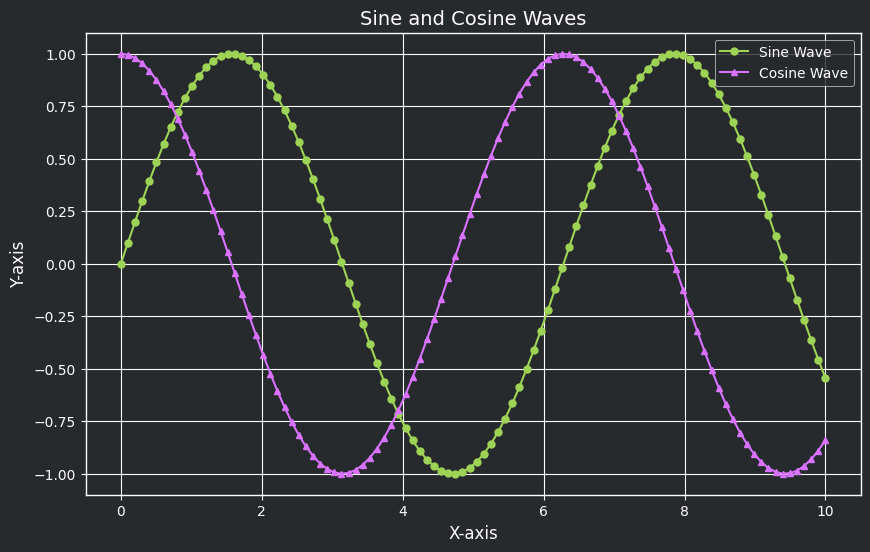

In [175]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the chart
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Define the color theme
bg_color = "#262A2C"
font_color = "#FFFBFE"
marker_color = "#FFC6AC"
main_color_1 = "#9FD356"
main_color_2 = "#D972FF"

# Configure the chart
plt.figure(figsize=(10, 6), facecolor=bg_color)
plt.plot(x, y1, color=main_color_1, marker='o',  markersize=5, label='Sine Wave')
plt.plot(x, y2, color=main_color_2, marker='^',  markersize=5, label='Cosine Wave')

# Style settings
plt.gca().set_facecolor(bg_color)
plt.title('Sine and Cosine Waves', color=font_color, fontsize=14)
plt.xlabel('X-axis', color=font_color)
plt.ylabel('Y-axis', color=font_color)
plt.tick_params(colors=font_color)
plt.legend(facecolor=bg_color, edgecolor=font_color, labelcolor=font_color)


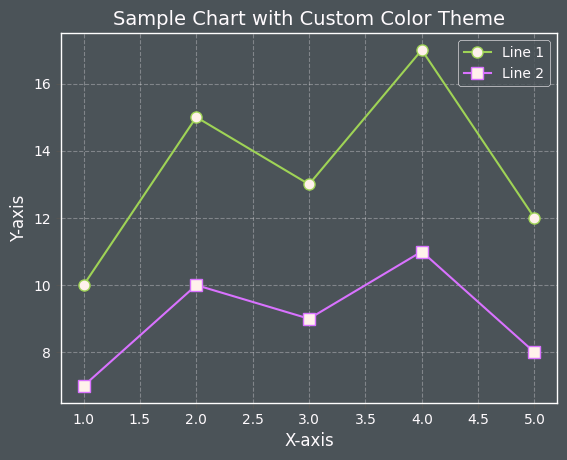

In [176]:
import matplotlib.pyplot as plt

# Color theme
bg_color = "#4B5358"        # Dark background
font_color = "#FFFBFE"      # Font color
marker_color = "#FFF1EB"    # Marker color
main_color1 = "#9FD356"     # Main Color 1
main_color2 = "#D972FF"     # Main Color 2

# Sample data
x = [1, 2, 3, 4, 5]
y1 = [10, 15, 13, 17, 12]
y2 = [7, 10, 9, 11, 8]

# Setting the dark background color
plt.figure(facecolor=bg_color)

# Line plot
plt.plot(x, y1, color=main_color1, marker='o', markersize=8, markerfacecolor=marker_color, label="Line 1")
plt.plot(x, y2, color=main_color2, marker='s', markersize=8, markerfacecolor=marker_color, label="Line 2")

# Customize plot appearance
plt.gca().set_facecolor(bg_color)   # Set the background color for the plot area
plt.xlabel("X-axis", color=font_color, fontsize=12)
plt.ylabel("Y-axis", color=font_color, fontsize=12)
plt.title("Sample Chart with Custom Color Theme", color=font_color, fontsize=14)
plt.xticks(color=font_color)
plt.yticks(color=font_color)

# Add legend with custom colors
plt.legend(facecolor=bg_color, edgecolor=font_color, labelcolor=font_color)

# Show grid
plt.grid(color=font_color, linestyle='--', alpha=0.3)

# Display the chart
plt.show()


# EDA Exercise - Exploring Different Types of Charts

There are so many variables that impact the price of a house. With dynamic parameters in the residential real state business, it is always important to reach a reasonable price for better business opportunities. As a part of the analytics team in a real state company, you have to come up with the variables that are impacting the price of the house through analyzing and visualizing the data.

> Check the data dictionary to have a better understanding of the column definitions and category meanings

In [177]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/housing_data.csv'
                 , index_col=0)#use the index from the csv file instead of the default one
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0       SC60       RL         65.0     8450   Pave   NaN      Reg         Lvl   
1       SC20       RL         80.0     9600   Pave   NaN      Reg         Lvl   
2       SC60       RL         68.0    11250   Pave   NaN      IR1         Lvl   
3       SC70       RL         60.0     9550   Pave   NaN      IR1         Lvl   
4       SC60       RL         84.0    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0    AllPub    Inside  ...        0     No    No          No       0    Feb   
1    AllPub       FR2  ...        0     No    No          No       0    May   
2    AllPub    Inside  ...        0     No    No          No       0    Sep   
3    AllPub    Corner  ...        0     No    No          No       0    Feb   
4    AllPub       FR2  ...        0     No    No          No       0    Dec   

   YrSold  SaleType  SaleCondition  SalePrice  
0    2008        WD         Normal     208500  
1    2007        WD         Normal     181500  
2    2008        WD         Normal     223500  
3    2006        WD        Abnorml     140000  
4    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [178]:
len(df.columns)

80

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

In [180]:
df.sample(7)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
564        SC60       RL          0.0    13346   Pave   NaN      IR1   
1209       SC20       RL         85.0    10182   Pave   NaN      IR1   
927        SC60       RL          0.0     9900   Pave   NaN      Reg   
1275       SC90       RL         95.0    11345   Pave   NaN      Reg   
143        SC20       RL         78.0    10335   Pave   NaN      IR1   
1058       SC60       RL         96.0    11308   Pave   NaN      IR1   
358        SC80       RL         92.0     6930   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
564          Lvl    AllPub   CulDSac  ...        0     No     No          No   
1209         Lvl    AllPub   CulDSac  ...        0     No     No          No   
927          Lvl    AllPub    Inside  ...        0     No  GdPrv          No   
1275         Lvl    AllPub    Corner  ...        0     No     No          No   
143          Lvl    AllPub    Inside  ...        0     No     No          No   
1058         Lvl    AllPub    Inside  ...        0     No     No          No   
358          Lvl    AllPub    Inside  ...        0     No     No          No   

     MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
564        0    Jul    2006        WD         Normal     268000  
1209       0    May    2006       New        Partial     290000  
927        0    Apr    2008        WD         Normal     176000  
1275       0    Jul    2007        WD         Normal     137000  
143        0    Jun    2009        WD         Normal     204000  
1058       0    Jul    2009        WD         Normal     335000  
358        0    Jul    2006        WD        Abnorml     130000  

[7 rows x 80 columns]

In [181]:
df.describe()

LotFrontage        LotArea  OverallQual  OverallCond    YearBuilt  \
count  1460.000000    1460.000000  1460.000000  1460.000000  1460.000000   
mean     57.623288   10516.828082     6.099315     5.575342  1971.267808   
std      34.664304    9981.264932     1.382997     1.112799    30.202904   
min       0.000000    1300.000000     1.000000     1.000000  1872.000000   
25%      42.000000    7553.500000     5.000000     5.000000  1954.000000   
50%      63.000000    9478.500000     6.000000     5.000000  1973.000000   
75%      79.000000   11601.500000     7.000000     6.000000  2000.000000   
max     313.000000  215245.000000    10.000000     9.000000  2010.000000   

       YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count   1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean    1984.865753   103.117123   443.639726    46.549315   567.240411  ...   
std       20.645407   180.731373   456.098091   161.319273   441.866955  ...   
min     1950.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%     1967.000000     0.000000     0.000000     0.000000   223.000000  ...   
50%     1994.000000     0.000000   383.500000     0.000000   477.500000  ...   
75%     2004.000000   164.250000   712.250000     0.000000   808.000000  ...   
max     2010.000000  1600.000000  5644.000000  1474.000000  2336.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  2007.815753  180921.195890  
std      55.757415    40.177307    496.123024     1.328095   79442.502883  
min       0.000000     0.000000      0.000000  2006.000000   34900.000000  
25%       0.000000     0.000000      0.000000  2007.000000  129975.000000  
50%       0.000000     0.000000      0.000000  2008.000000  163000.000000  
75%       0.000000     0.000000      0.000000  2009.000000  214000.000000  
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000  

[8 rows x 35 columns]

In [182]:
# get the top 10 most expensive neighborhoods by average SalePrice
df.groupby('Neighborhood')['SalePrice'].mean().nlargest(10)

Neighborhood
NoRidge    335295.317073
NridgHt    316270.623377
StoneBr    310499.000000
Timber     242247.447368
Veenker    238772.727273
Somerst    225379.837209
ClearCr    212565.428571
Crawfor    210624.725490
CollgCr    197965.773333
Blmngtn    194870.882353
Name: SalePrice, dtype: float64

<Axes: ylabel='Neighborhood'>

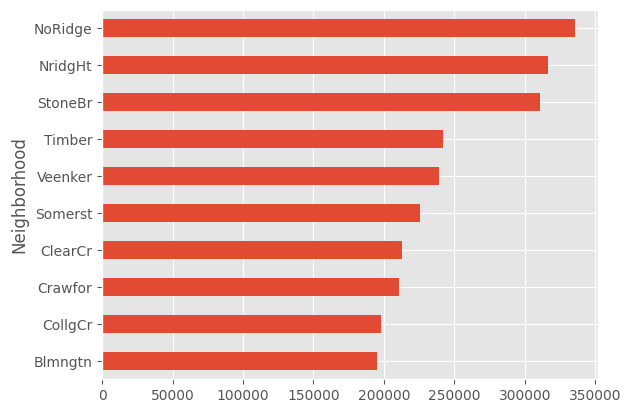

In [183]:
# get the top 10 most expensive neighborhoods based on highest average
df.groupby('Neighborhood')['SalePrice'].mean().nlargest(10).sort_values().plot(kind='barh')

<Axes: ylabel='Neighborhood'>

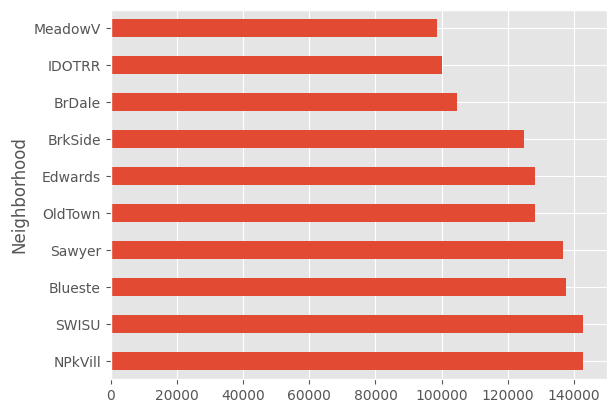

In [184]:
#viz using the builtin plotting libr in pandas
df.groupby('Neighborhood')['SalePrice'].mean().nsmallest(10).sort_values(ascending=False).plot(kind='barh')

In [185]:
cat_features_list = df.select_dtypes(include=['object']).columns
cat_features_list

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')

In [186]:
num_features_list = df.select_dtypes(include=np.number).columns
num_features_list

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

> NOTE: Be aware of categorical columns that have numerical values. e.g. OverallQual. You need to remove them manually from the num feature list

**About Seaborn**
- `pip install seaborn`
- Powerful data visualization library built on top of `matplotlib`
- It is rich with statistical graphs, such as histograms, regression, heatmaps, etc...
- It has nice themes and styling
- Works very well with `pandas`

In [187]:
pip show seaborn

Python(39436) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages
Requires: matplotlib, numpy, pandas
Required-by: ambivalent
Note: you may need to restart the kernel to use updated packages.


`pip install seaborn==0.12.2`

In [188]:
import seaborn as sns

## Univariate Analysis

- "uni" means one
- analyzing one variable/feature/column
- simplest form of EDA and it's recommended to start with
- It doesn't deal with causation or relationship
- It can be done with both **numerical** and **categorical** columns
- Types:
    - Histograms
    - KDE (Bell curves)
    - Box and Whisker plots
    - Swarm
    - Violin

### Categorical Histograms

<Axes: xlabel='BsmtQual', ylabel='Count'>

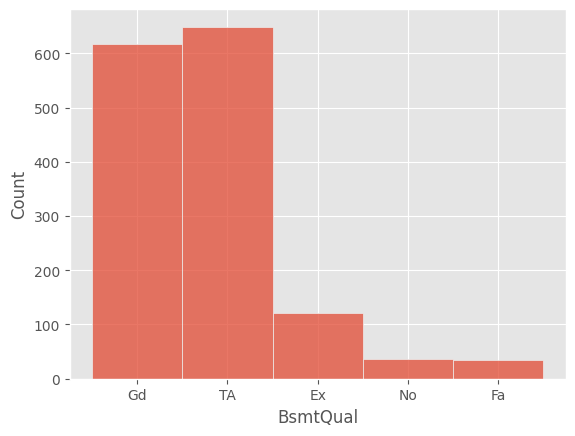

In [189]:
sns.histplot(data=df, x='BsmtQual')

**Observation**
- Gd (Good 90-99) and TA (Typical 80-89) are the most common basement quality evaluation
- The rest, such as No, Fa (no basement and fair ) and the least common

### Numerical Histograms

<Axes: >

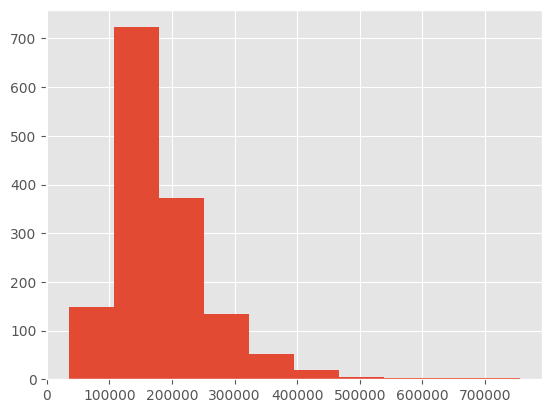

In [190]:
#using pandas builtin viz
df['SalePrice'].hist()

([<matplotlib.axis.XTick at 0x2aab04510>,
 [Text(40000, 0, '40000'),
  Text(90000, 0, '90000'),
  Text(140000, 0, '140000'),
  Text(190000, 0, '190000'),
  Text(240000, 0, '240000'),
  Text(290000, 0, '290000'),
  Text(340000, 0, '340000'),
  Text(390000, 0, '390000'),
  Text(440000, 0, '440000'),
  Text(490000, 0, '490000')])

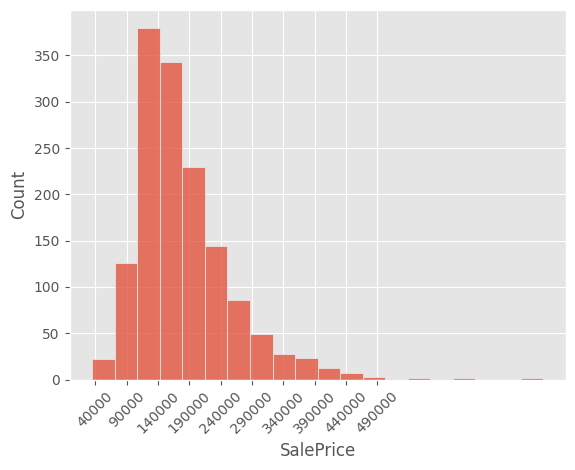

In [191]:
sns.histplot(data=df, x='SalePrice', bins=20)
plt.xticks(ticks=np.arange(40000, 500000, 50000), rotation=45)

**Observations**
- The bucket/bin of $140k to $155k (estimate) has the highest occurrence. Most houses were sold between that range.
- Before applying the filter: 
    - We noticed that we have multiple outliers in SalePrice
    - The distribution is positively skewed

**Observations**
- The distribution of the SalePrice is positively skewed. Therefore, we have extreme values on the right side (outliers) 
- Outliers at the max price is affecting mean
- Mean > Median

**About bin size**
- There's no rule of thumb of how many bins to choose for your data
- Every data element is different
- Basically, the goal is to avoid have bins that are too small or too large
 
![bins comp](https://statistics.laerd.com/statistical-guides/img/uh/laerd-statistics-example-histograms-showing-different-bin-sizes.png)

Example of a balanced num of bins:
 
![good hist](https://statistics.laerd.com/statistical-guides/img/uh/laerd-statistics-example-histogram-frequencies-for-age.png)

([<matplotlib.axis.XTick at 0x2b8d25250>,
 [Text(34900, 0, '34900'),
  Text(84900, 0, '84900'),
  Text(134900, 0, '134900'),
  Text(184900, 0, '184900'),
  Text(234900, 0, '234900'),
  Text(284900, 0, '284900'),
  Text(334900, 0, '334900'),
  Text(384900, 0, '384900')])

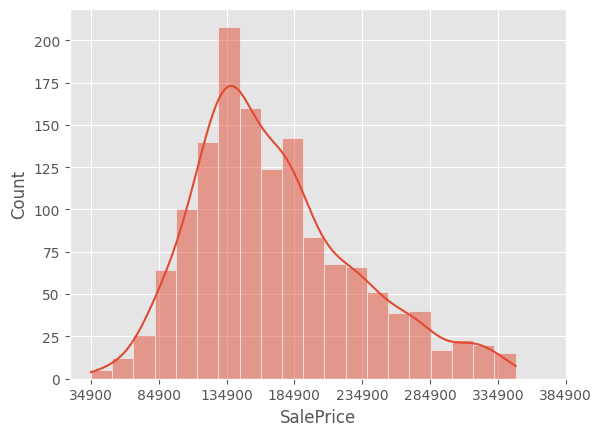

In [192]:
# visually remove extreme values to focus on most frequ values
# add a KDE (Kernel Density Estimate)
sns.histplot(data=df[df['SalePrice']<350000], x='SalePrice', bins=20, kde=True)
plt.xticks(np.arange(df['SalePrice'].min(), 400000, 50000))

Make labels more granular

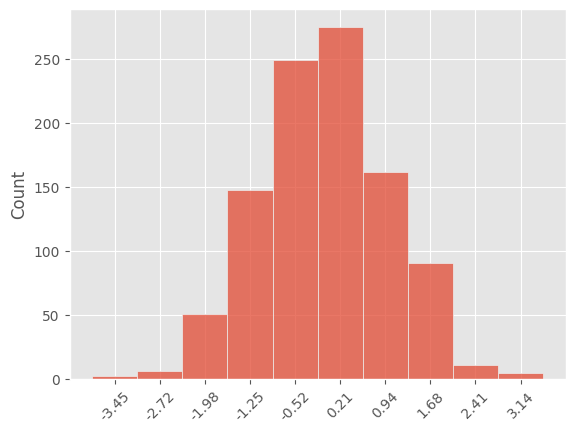

In [193]:
# Sample data
data = np.random.normal(0, 1, 1000)

# Create a histogram with Seaborn
sns.histplot(data, bins=10, kde=False)

# Get the current axis
ax = plt.gca()

# Set x-axis labels for each bin
bin_edges = ax.patches[0].get_x()  # Get the left edge of the first bin
bin_width = ax.patches[0].get_width()  # Get the width of the bins
bin_centers = [edge + bin_width / 2 for edge in np.arange(bin_edges, bin_edges + bin_width * 10, bin_width)]

# Set the x-ticks to the bin centers
plt.xticks(bin_centers, labels=[f"{x:.2f}" for x in bin_centers], rotation=45)

# Show the plot
plt.show()

Custom bin sizes

In [194]:
df['SalePrice'].min(), df['SalePrice'].max()

(34900, 755000)

<Axes: xlabel='SalePrice', ylabel='Count'>

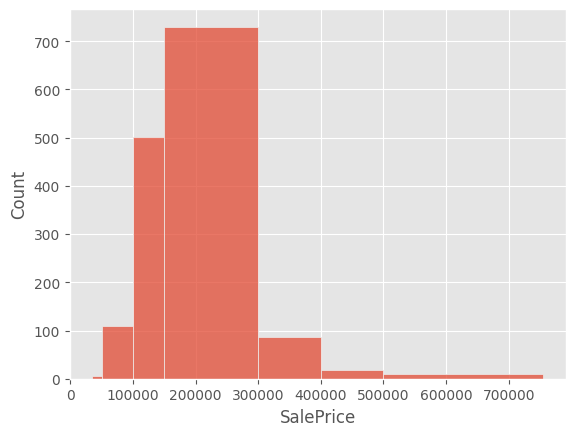

In [195]:
#define bin edges
bin_edges = [34900, 50000, 100000, 150000, 300000, 400000, 500000, 755000]

sns.histplot(data=df, x='SalePrice', bins=bin_edges)

### Box and Whisker Plots
**Anatomy of a Box Plot**
</br>
![boxplot](https://miro.medium.com/max/9000/1*2c21SkzJMf3frPXPAR_gZA.png)

<Axes: xlabel='LotArea'>

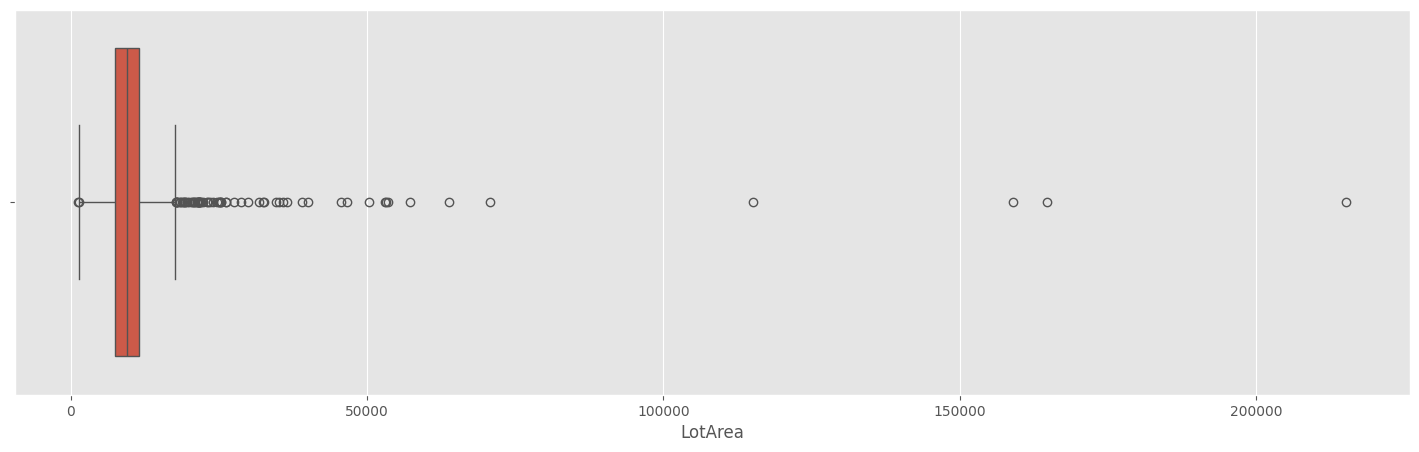

In [196]:
plt.figure(figsize=(18,5))
sns.boxplot(x=df['LotArea'])

- The boxplot above shows that we have a lot of outliers because soe houses may have acres of land
- The LotArea is heavily skewed

<Axes: xlabel='SalePrice'>

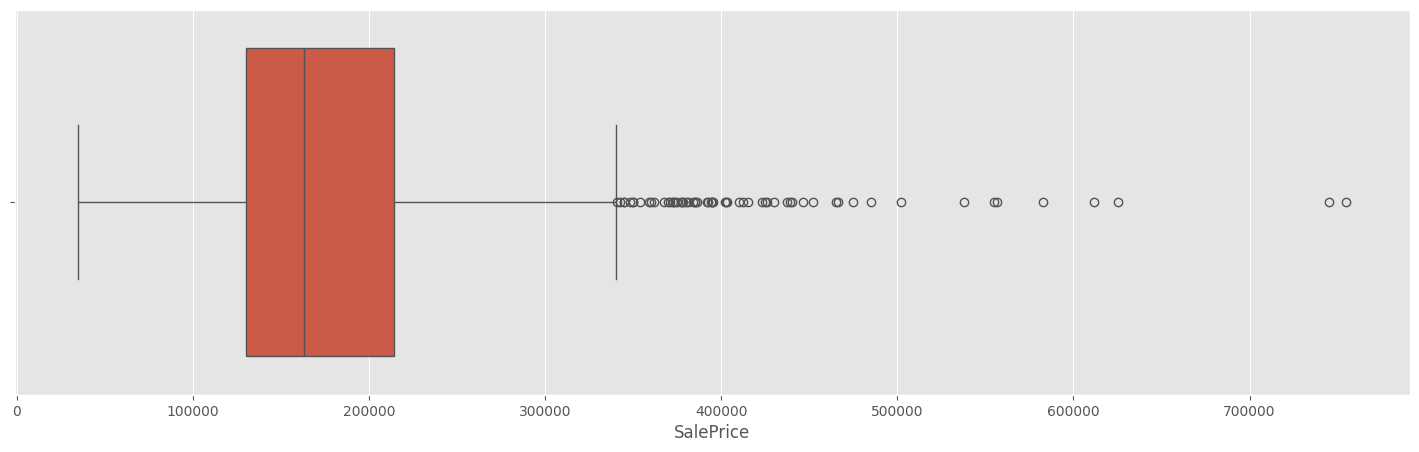

In [197]:
plt.figure(figsize=(18,5))
sns.boxplot(x=df['SalePrice'])

(2000.0, 14000.0)

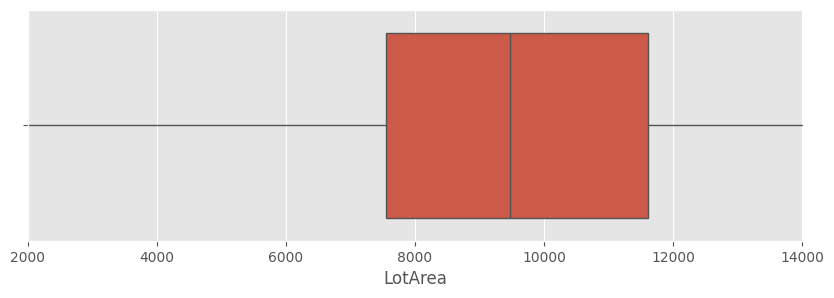

In [198]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df, x='LotArea')
plt.xlim([2000,14000])

<Axes: ylabel='SalePrice'>

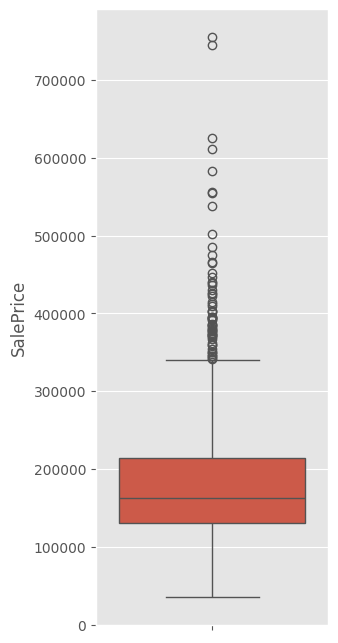

In [199]:
plt.figure(figsize=(3,8)) #dpi=300increase the resolution
sns.boxplot(y=df['SalePrice'])

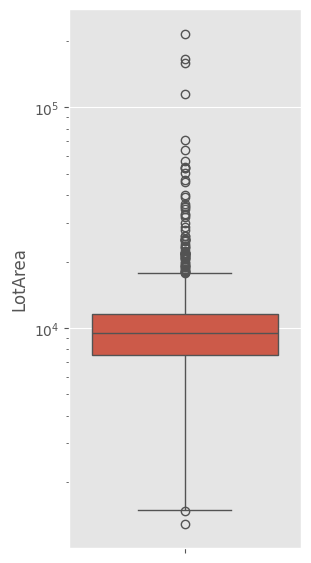

In [200]:
plt.figure(figsize=(3,7))
sns.boxplot(y=df['LotArea'])
plt.yscale('log')

#### Using `subplots()`
- using Subplots helps create multiple plots in single figure (grid)
- Useful for comparing multiple visuals side-by-side
- to use subplots in seaborn, you need to use matplotlib 
- each element/plot in the grid can be references using indices

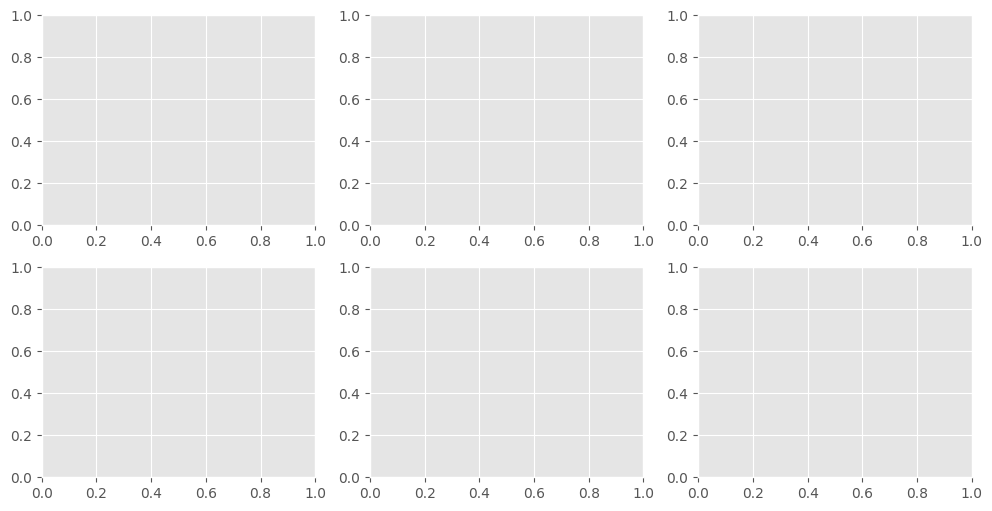

In [201]:
# build a grid of plots 2 x 3

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

**Exercise** Build a histogram and box plot analysis for SalePrice and YearBuilt

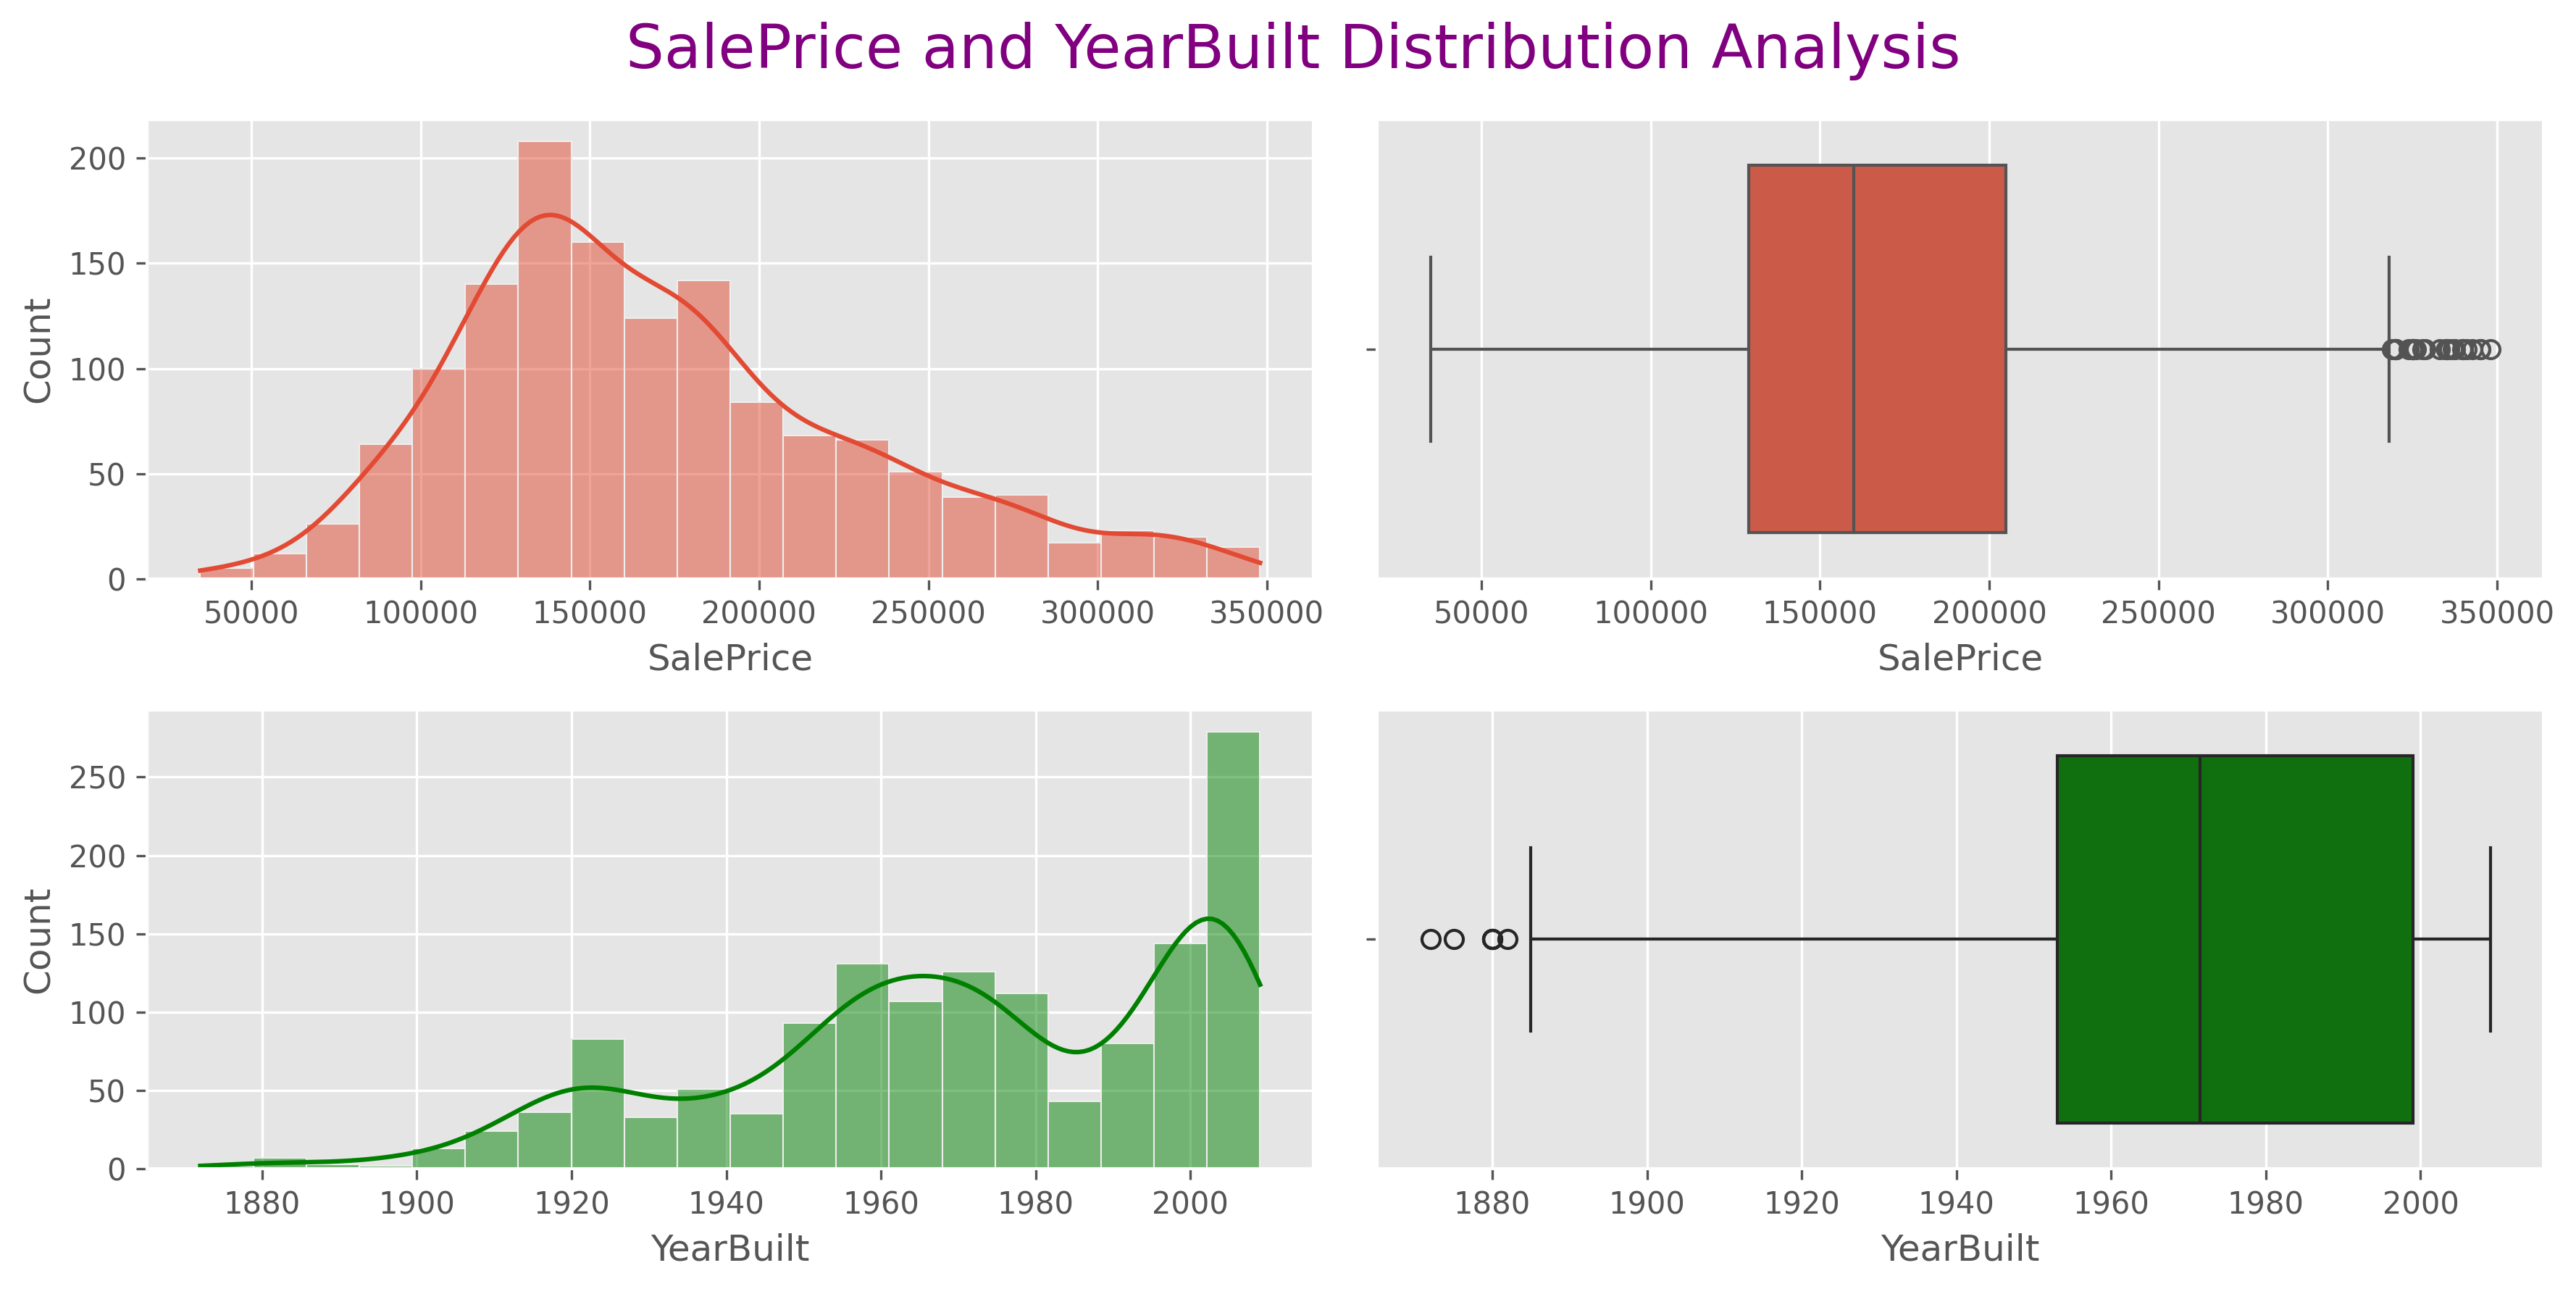

In [202]:

# build a grid of plots 2 x 2
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6), dpi=300)

# inserting plots inside the grid
# let's build an analysis for SalePrice and Yearbuilt using 2 different charts
sns.histplot(data=df[df['SalePrice']<350000], x='SalePrice', bins=20, kde=True, ax=axes[0,0])
sns.histplot(data=df[df['SalePrice']<350000], x='YearBuilt', bins=20, kde=True, ax=axes[1,0], color='green')
#boxplots
sns.boxplot(data=df[df['SalePrice']<350000], x='SalePrice', ax=axes[0,1])
sns.boxplot(data=df[df['SalePrice']<350000], x='YearBuilt', ax=axes[1,1], color='green')

fig.suptitle('SalePrice and YearBuilt Distribution Analysis', fontsize=20, color='purple')
fig.tight_layout() #avoid overlapping lables and gives margins between charts

- SalePrice is positively skewed and YearBuilt is negatively skewed
- YearBuilt is very skewed compared SalePrice
- SalePrice appears to be between $140 and $145k
- Boxplots confirm th skewness and show that we have outliers on the left side for YearBuilt and on the right side for SalePrice


In [203]:
num_features_list

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

#### Automate Building Charts with Subplots

**Exercise** Automate building 4 numerical columns as histograms in one grid where SalePrice is less than $400K

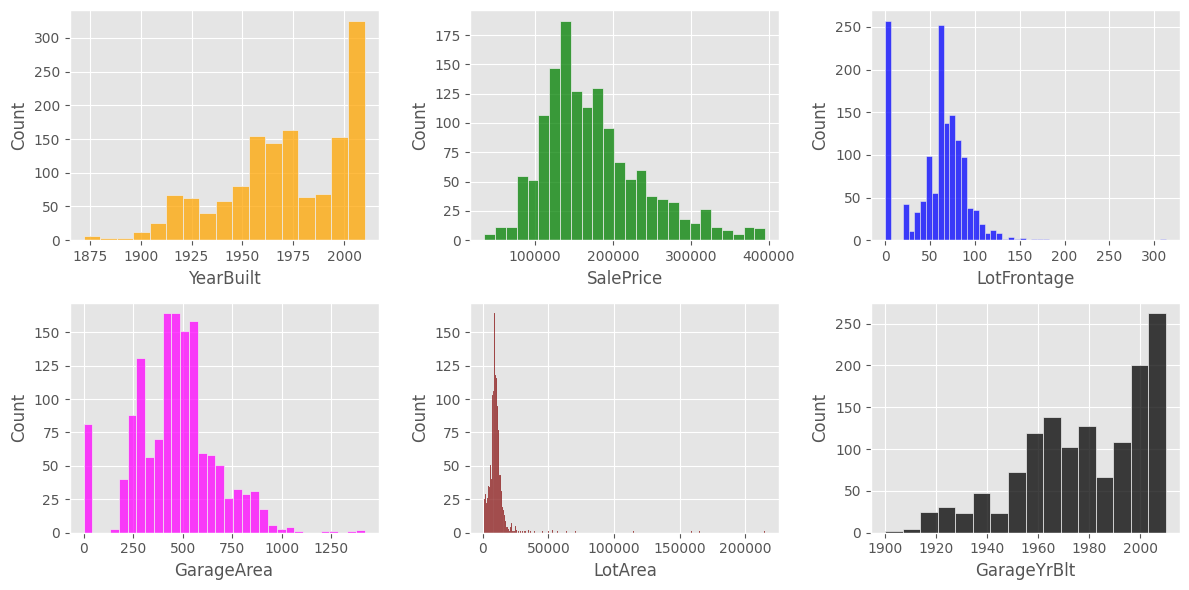

In [204]:



my_plot_cols = ['YearBuilt', 'SalePrice', 'LotFrontage', 'GarageArea', 'LotArea', 'GarageYrBlt']
col_list = ['orange', 'green', 'blue', 'magenta', 'maroon', 'black']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

threshold = 400000

#sub df
subplot_df = df[df['SalePrice']<threshold][my_plot_cols]

# flatten axes position to 0,1,2,3 (from e.g. [0,0] and [0,1])
axes = axes.flatten()

for idx, col in enumerate(my_plot_cols):
    sns.histplot(data=subplot_df, x=col, ax=axes[idx], color=col_list[idx])

fig.tight_layout()

Change chart type based on column name

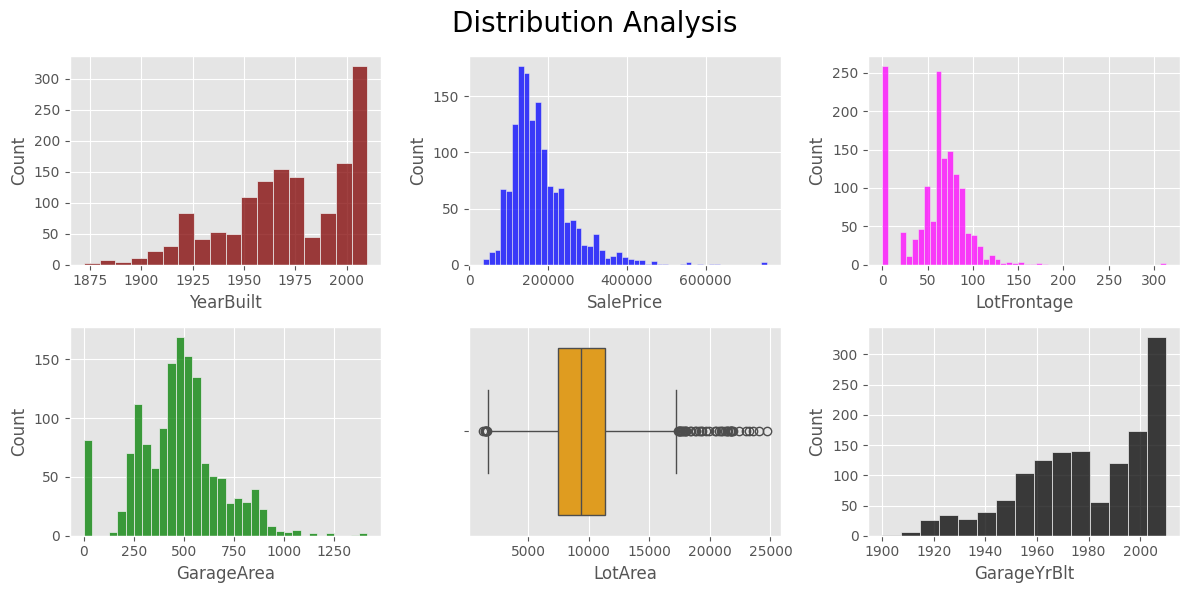

In [205]:
my_plot_cols = ['YearBuilt', 'SalePrice', 'LotFrontage', 'GarageArea', 'LotArea', 'GarageYrBlt']
color_list = ['maroon', 'blue', 'magenta', 'green', 'orange', 'black'] 

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,6))

#flatten the axes location to 0,1,2,3
axes = axes.flatten()

for idx, col in enumerate(my_plot_cols):
    if col =='LotArea':
        sns.boxplot(data=df[df['LotArea']<25000], x=col, ax=axes[idx], color=color_list[idx])   
    else:     
        sns.histplot(data=df, x=col, ax=axes[idx], color=color_list[idx])

fig.suptitle('Distribution Analysis', fontsize=20)


fig.tight_layout()

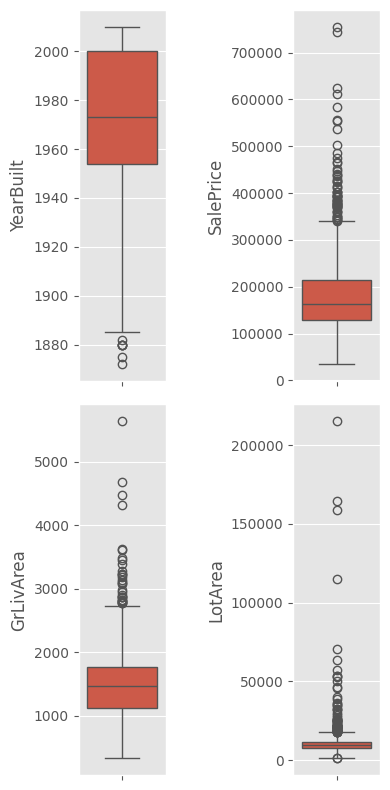

In [206]:
my_col_list = ['YearBuilt','SalePrice','GrLivArea', 'LotArea']

#build a separate df for the visualization
subplot_df = df[my_col_list]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(4,8))

#reset the index for chart location in the grid
index = 0 
#flatten the axes location into one dimensions to iterate through the list
axes = axes.flatten()

#iterate through key:value in the dataframe (cols and their values)
for k, v in subplot_df.items():
    sns.boxplot(data=subplot_df, y=k, ax=axes[index]) #build a hist for each column
    index += 1 #incrementing by 1 for the cell location in the grid

fig.tight_layout(w_pad=3)

#### Countplot

In [207]:
df['SaleCondition'].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Normal'),
  Text(1, 0, 'Abnorml'),
  Text(2, 0, 'Partial'),
  Text(3, 0, 'AdjLand'),
  Text(4, 0, 'Alloca'),
  Text(5, 0, 'Family')])

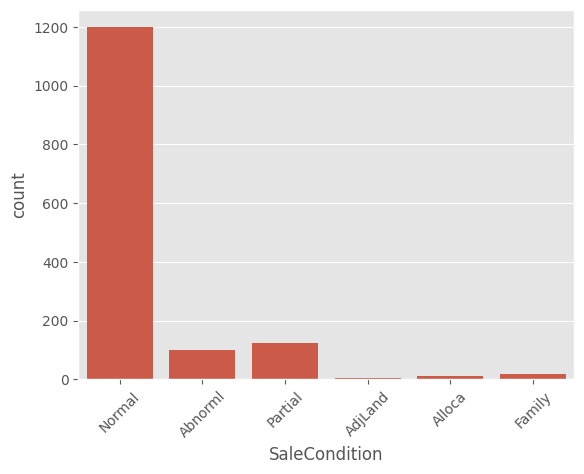

In [208]:
sns.countplot(x=df['SaleCondition'])
plt.xticks(rotation=45)

''

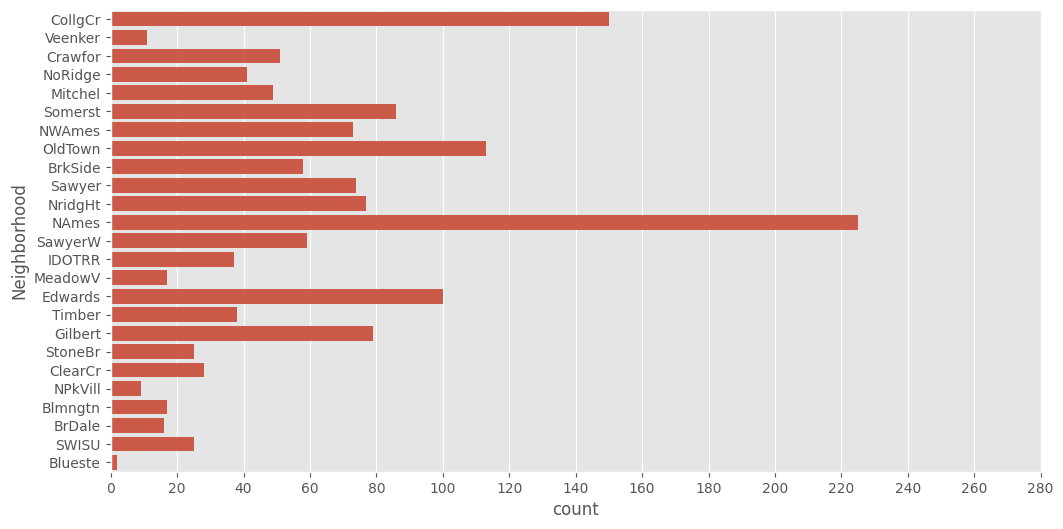

In [209]:
plt.figure(figsize=(12,6))
sns.countplot(y=df['Neighborhood'])
plt.xticks(list(range(0,300,20)))
#get rid of extra text
;

/var/folders/3x/ds4ljhhn611fn_glg6pp102h0000gq/T/ipykernel_42113/2281399728.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df


''

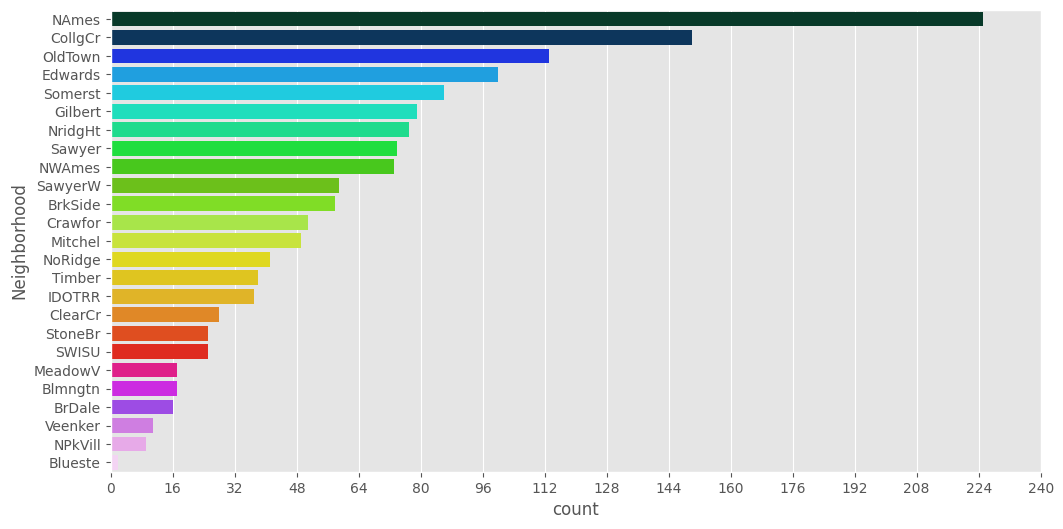

In [210]:
import math 

end_point = df['Neighborhood'].value_counts().max() + 20
steps = math.floor(end_point/15)

plt.figure(figsize=(12,6))
sns.countplot(data=df
              , y='Neighborhood'
              , order=df['Neighborhood'].value_counts().index
              , palette='gist_ncar')

plt.xticks(range(0,end_point,steps))
;

''

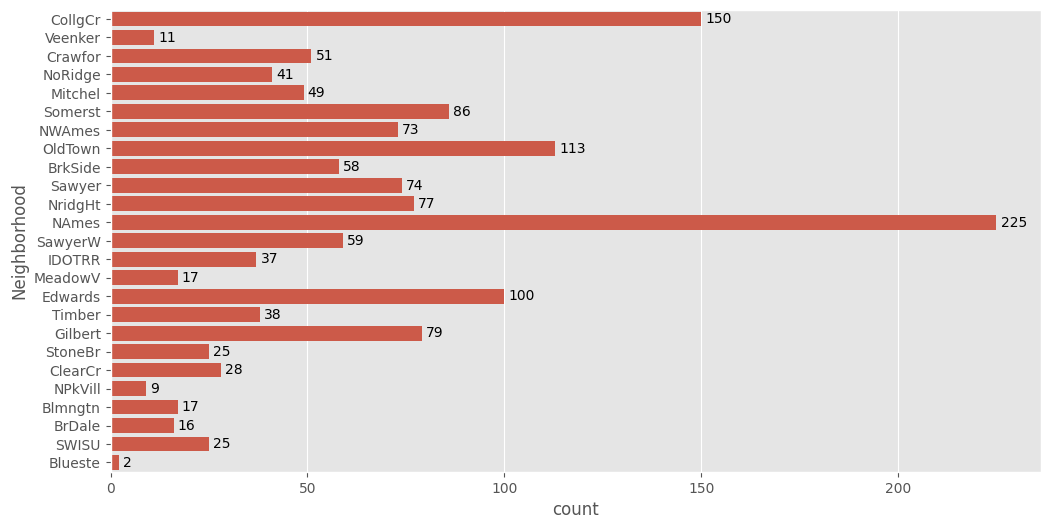

In [211]:
end_point = df['Neighborhood'].value_counts().max() + 25
steps = int(end_point/15)

plt.figure(figsize=(12,6))
ax = sns.countplot(y=df['Neighborhood']) # add hue=df['Neighborhood'] if your bars are not colored

for a in ax.containers:
    ax.bar_label(a,padding=3)

#ax.bar_label(ax.containers[0]) works too
;

Advanced axis tick customization: https://matplotlib.org/3.1.1/gallery/ticks_and_spines/tick-locators.html

Additional 

`pip install squarify`

In [212]:
neighb_cnt = df['Neighborhood'].value_counts()
neighb_cnt[:5]

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Name: count, dtype: int64

(0.0, 100.0, 0.0, 100.0)

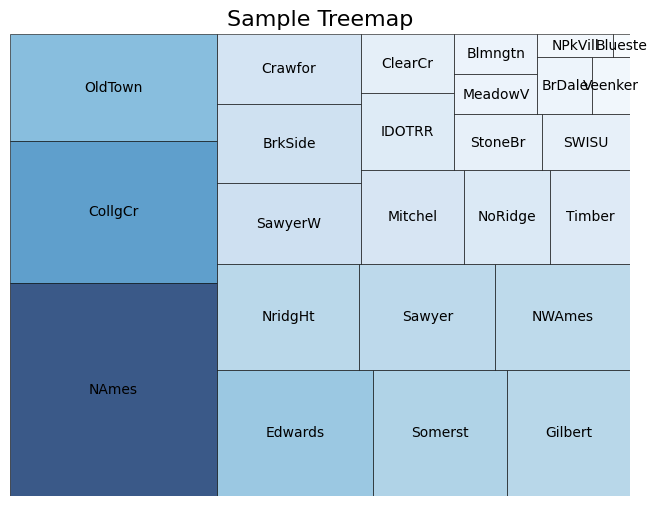

In [213]:
import squarify
import matplotlib.cm as cm

cmap = cm.Blues  # Choose a colormap (e.g., 'viridis', 'plasma', 'coolwarm')


# Create the treemap
plt.figure(figsize=(8, 6))
squarify.plot(
    sizes=neighb_cnt,
    label=neighb_cnt.index,
    ec = 'black', #edges
    alpha=0.8,  # Transparency
    color=[cmap(value / max(neighb_cnt)) for value in neighb_cnt]  # Normalize to [0, 1]
)

# Customize appearance
plt.title("Sample Treemap", fontsize=16)
plt.axis("off")  # Hide axes

### Multivariate Analysis

- Multi: analyzing multiple factors/columns/features
- Find the relationship between 2 or more variables
- Types:
    - Numeric vs Numeric
    - Categorical vs Numeric
    - Categorical vs Categorical

#### Numeric vs Numeric

##### Scatterplots

Text(0, 0.5, 'Above grade (ground) living area sqft (GrLivArea)')

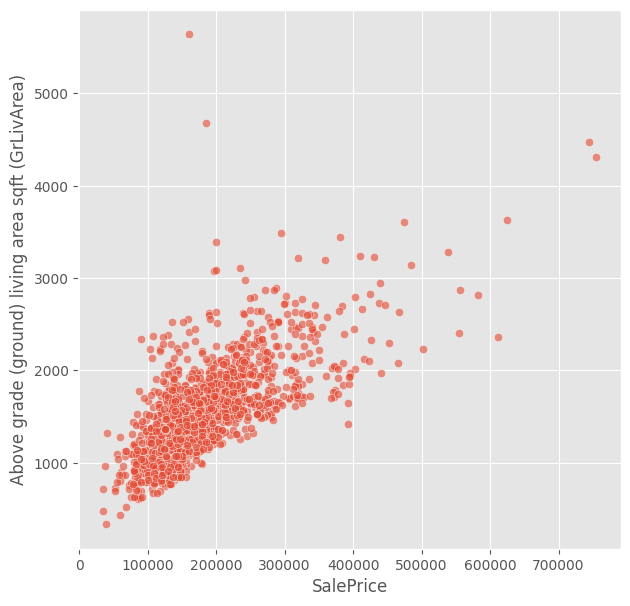

In [214]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=df['SalePrice'], y=df['GrLivArea'], alpha=0.6)
plt.ylabel('Above grade (ground) living area sqft (GrLivArea)')

**Observations**
- Sale price generally increases as square footage increases (positive correlation between the 2 columns)
- The higher the Sale Price is, the lower the correlation gets with GrLivArea
- We can see the same outliers observed earlier from our univariate analysis

Include Multiple Factors/Features In Scatterplots

Text(0.5, 0, 'Above grade (ground) living area sqft (GrLivArea)')

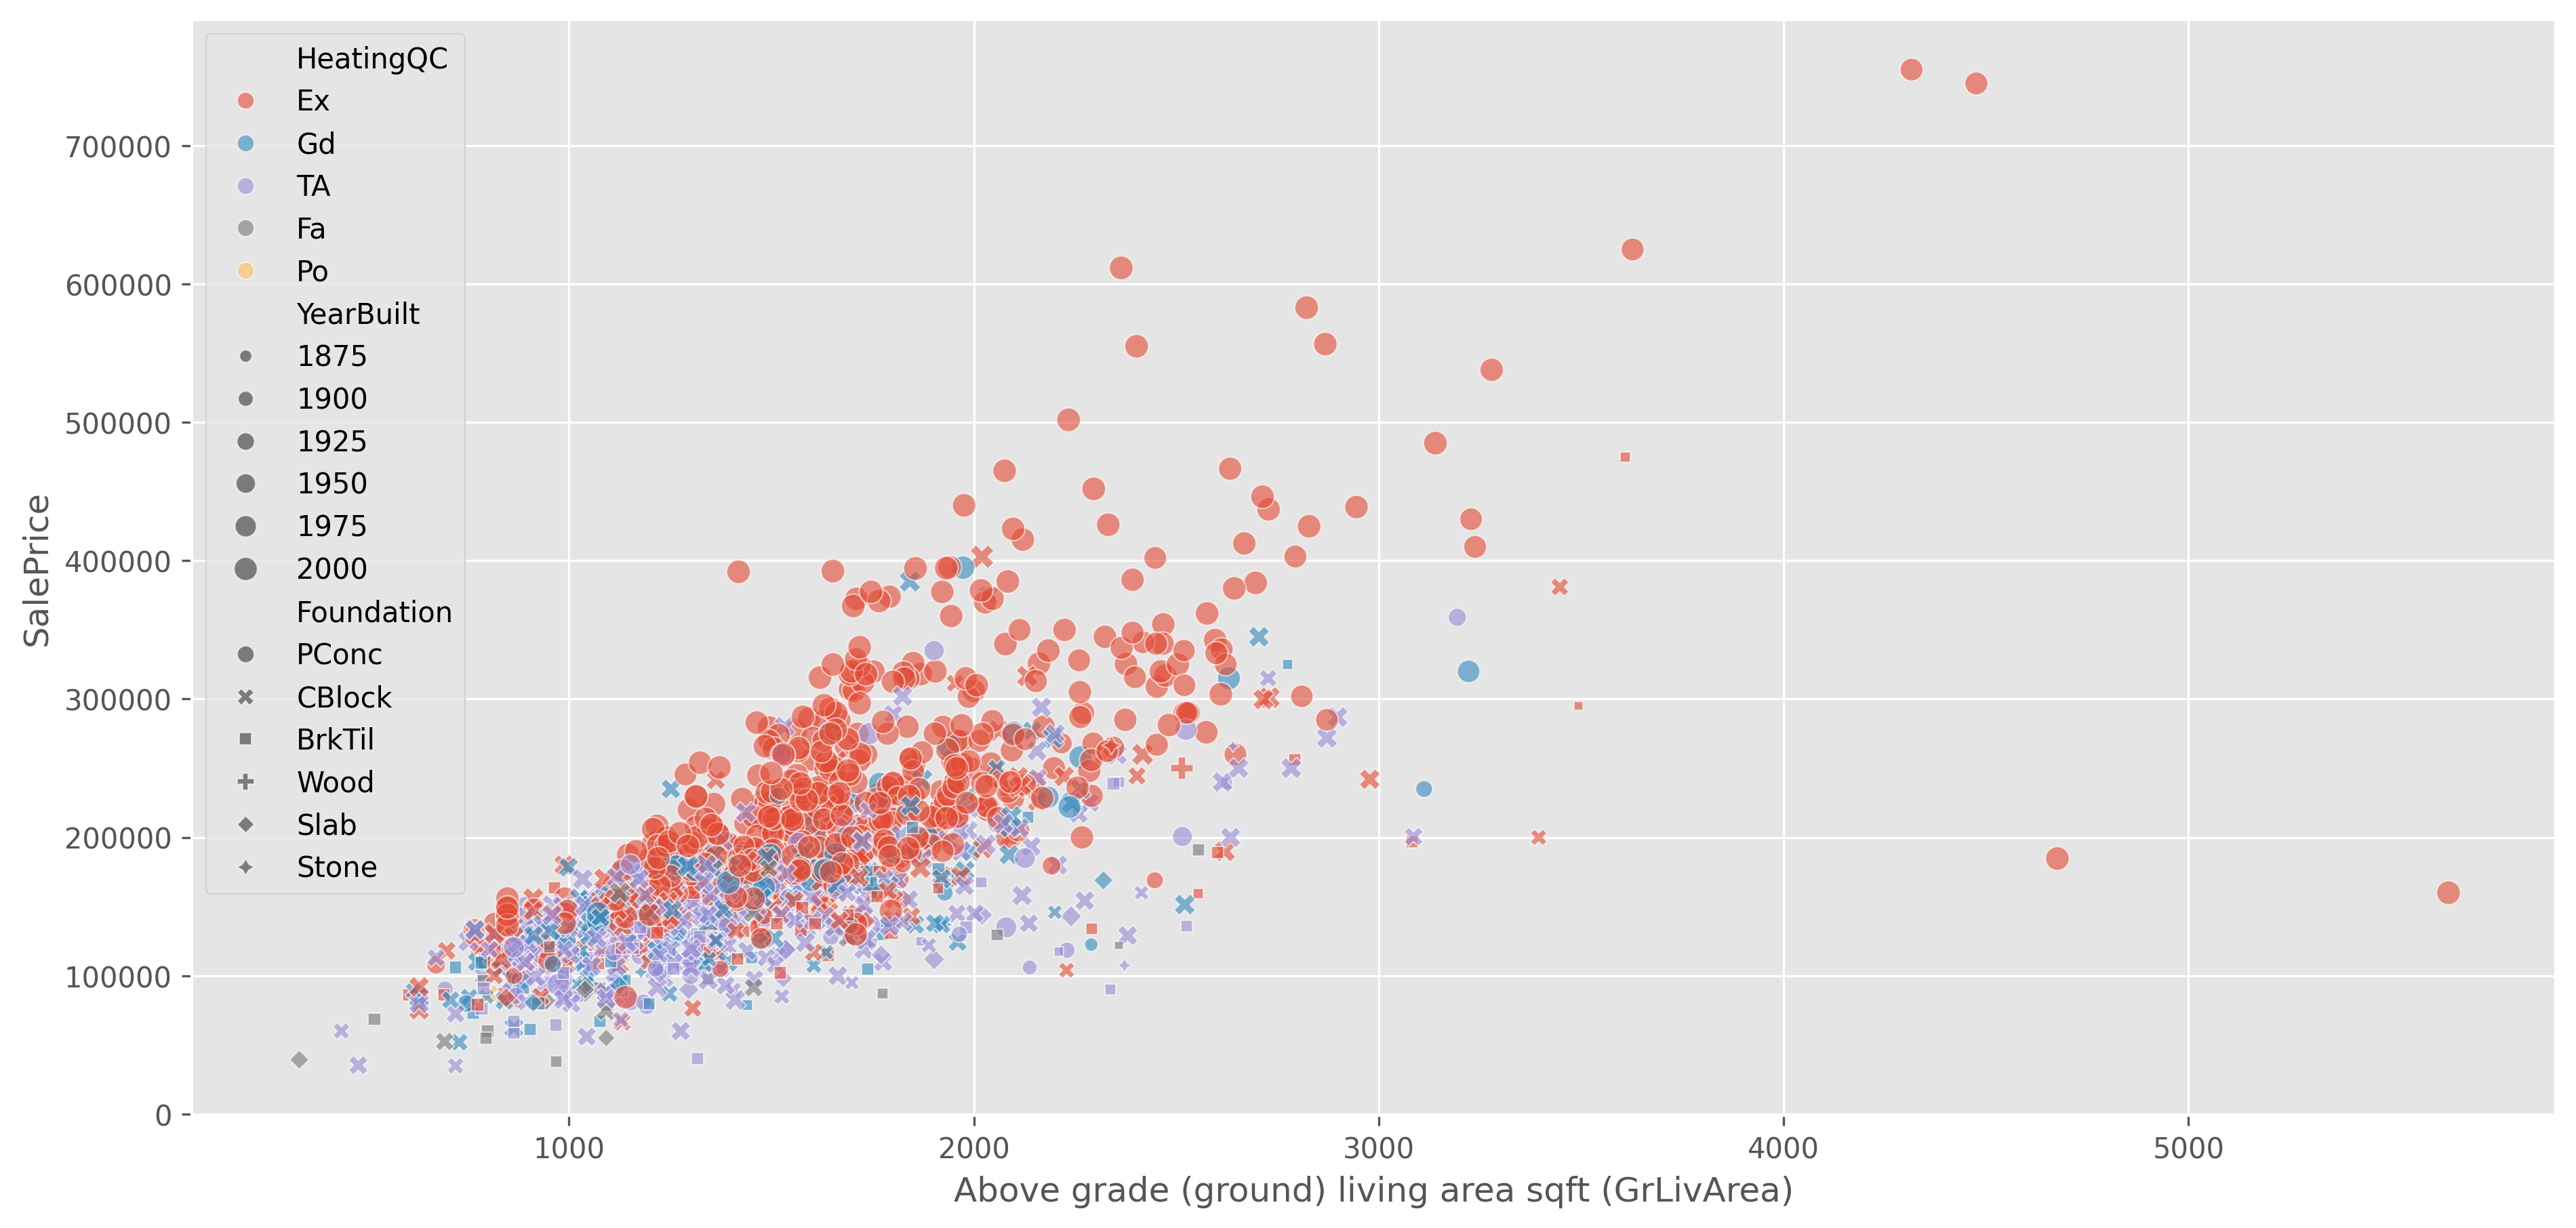

In [215]:
plt.figure(figsize=(15,7), dpi=300)
sns.scatterplot(x=df['GrLivArea'], y=df['SalePrice']
                , size=df['YearBuilt']
                , alpha=.6 # add transparency to see overlapping markers
                , hue=df['HeatingQC']
                , style=df['Foundation']
                )
plt.xlabel('Above grade (ground) living area sqft (GrLivArea)')

##### `regplot`

They're useful for statistical analysis, such as Linear Regression (Linear Model Plot =lmplot)

''

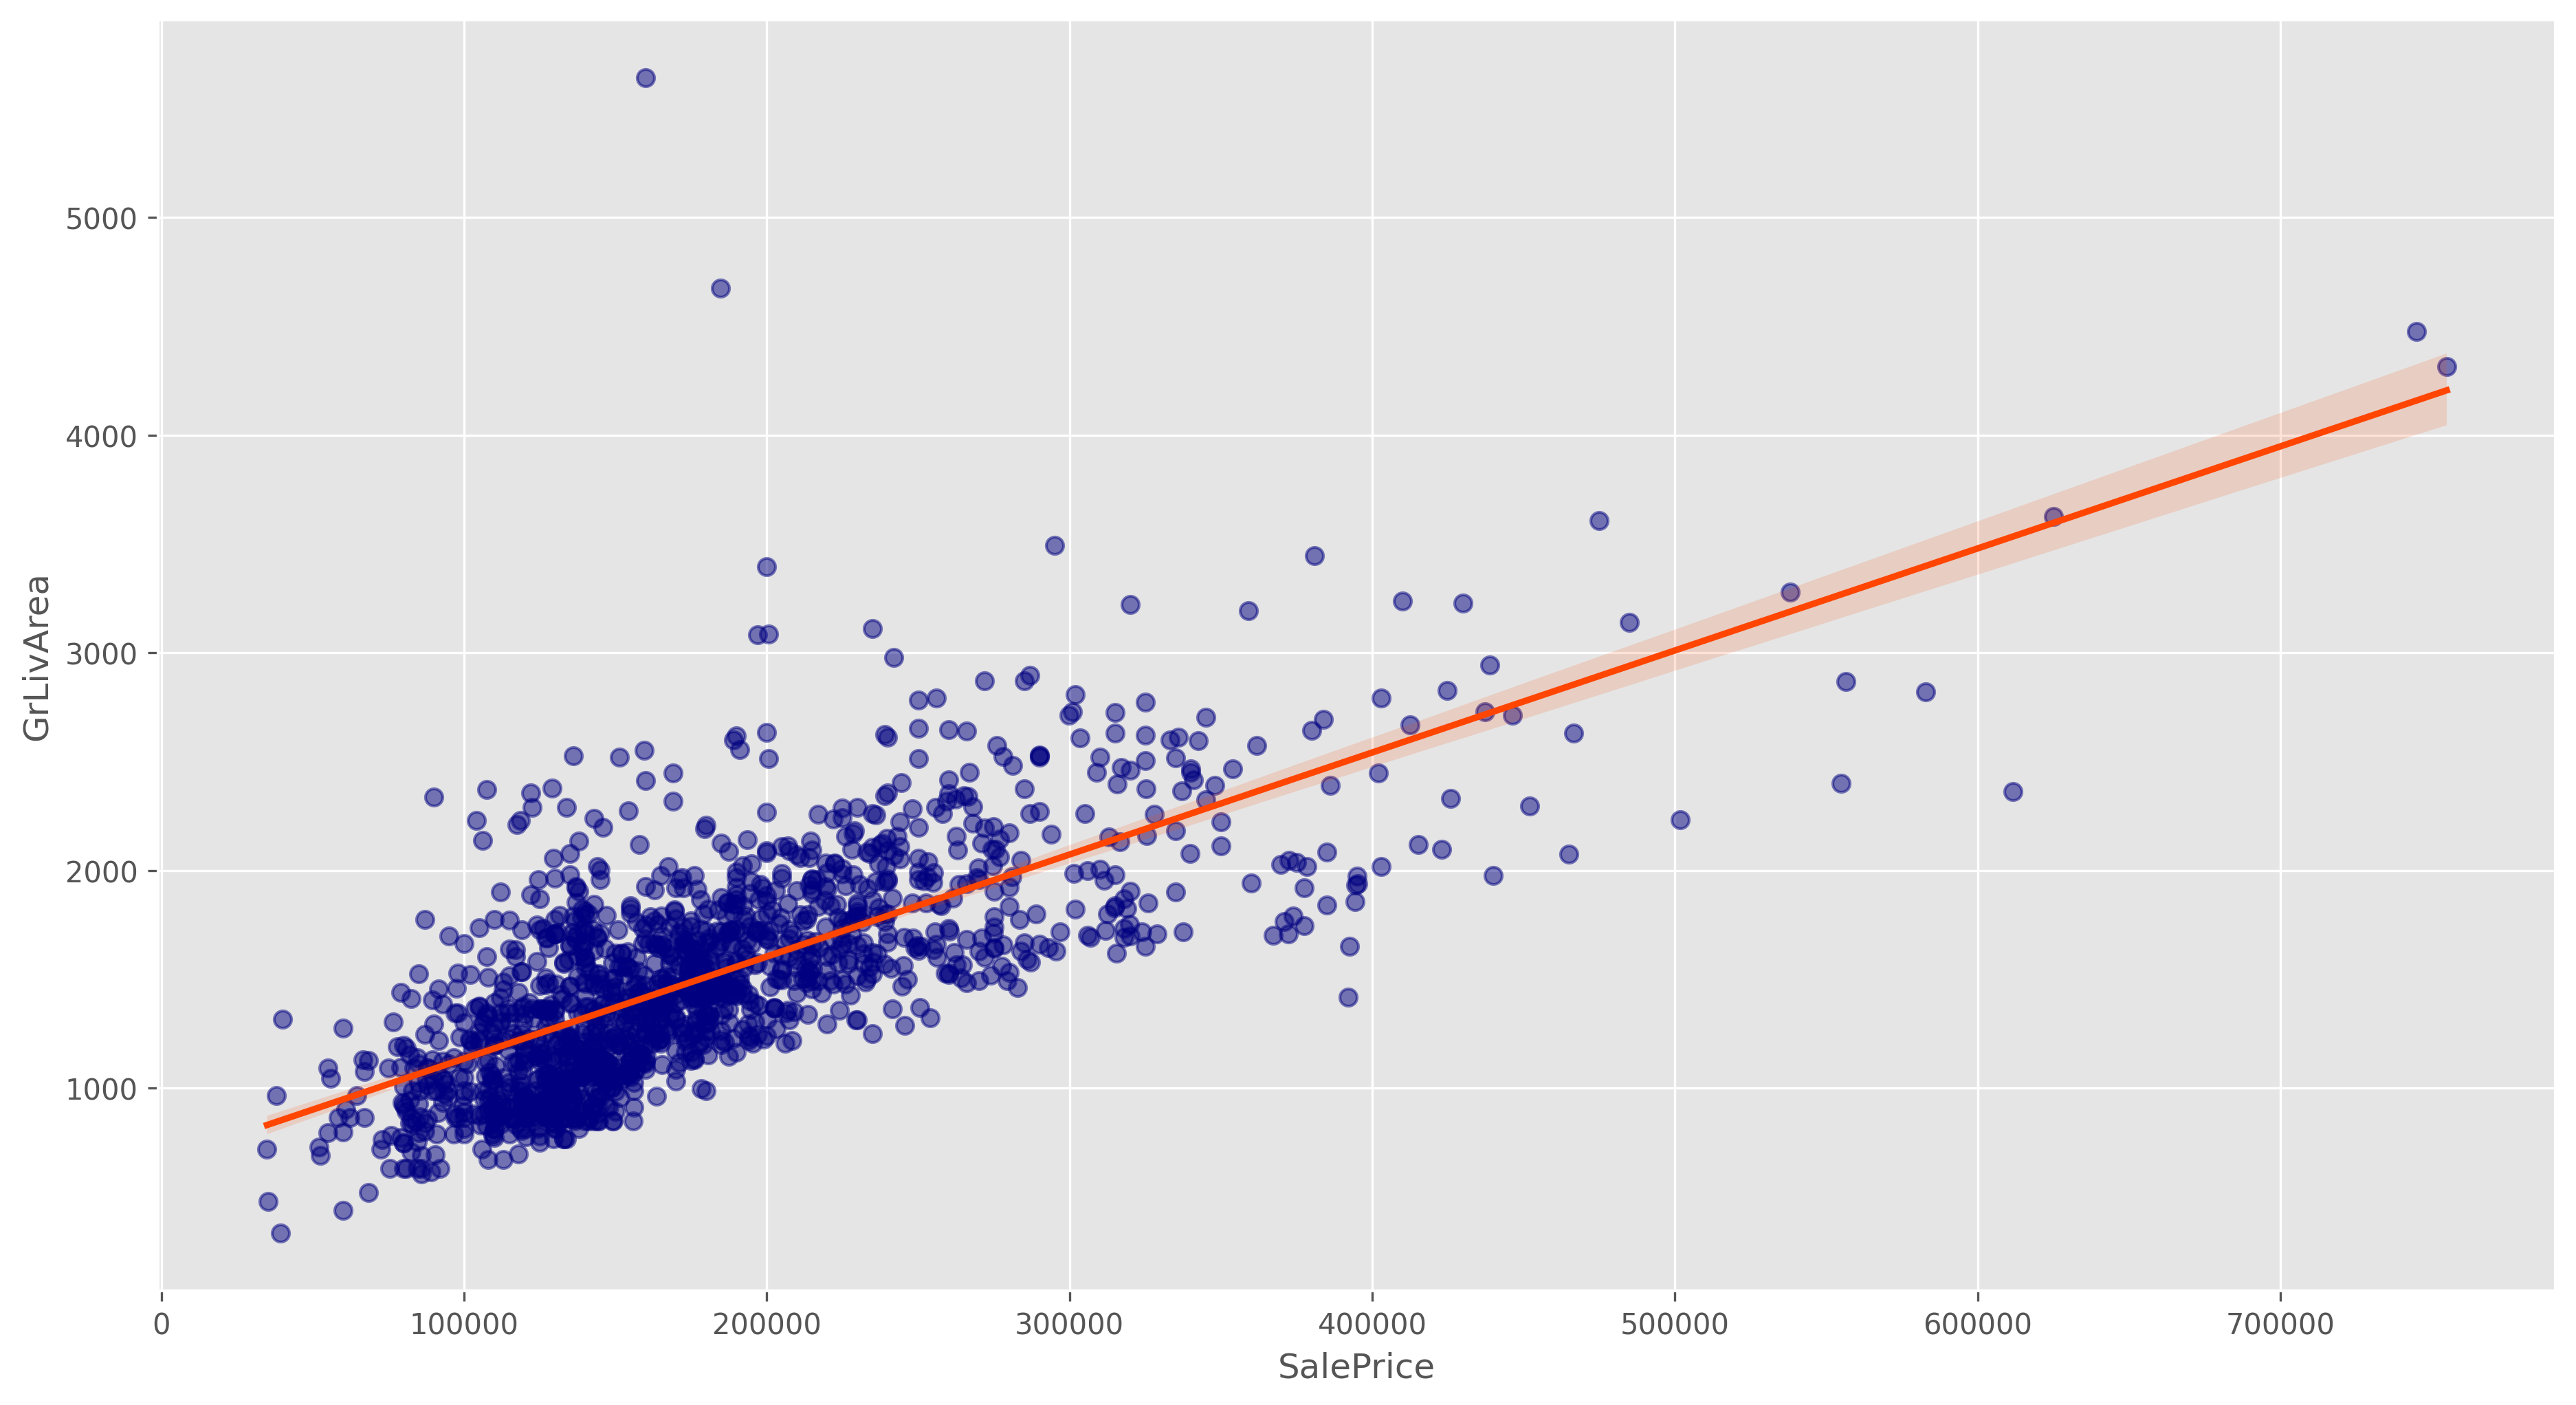

In [216]:
#sns.lmplot(data=df, x='SalePrice', y='GrLivArea', fit_reg=True)
#plt.xticks(rotation=45)
#;
plt.figure(figsize=(15,8), dpi=300)

sns.regplot(data=df, x='SalePrice', y='GrLivArea',
            scatter_kws = {"color": "navy", "alpha": 0.5},
            line_kws = {"color": "orangered"},
            ci = 95) # 99% level 
;

In Seaborn, both `lmplot` and `regplot` are used for visualizing linear relationships and fitting linear regression models to data, but they have some key differences in how they are used:

1. **`lmplot`**:
   - **Faceting**: `lmplot` is designed to work with **FacetGrid**, which means it can create a grid of subplots based on categorical variables (e.g., grouping by a variable). This is useful for plotting multiple regressions for subsets of the data.
   - **High-level interface**: `lmplot` is a higher-level function compared to `regplot`. It is more suited for creating complex visualizations with multiple subplots.
   - **Use case**: Ideal for comparing linear regression models across different groups in a dataset.

   Example:
   ```python
   sns.lmplot(x="x", y="y", data=df, hue="group")
   ```

2. **`regplot`**:
   - **Single Plot**: `regplot` is intended for a single plot, meaning it doesn’t support faceting or creating a grid of plots. It is a lower-level function compared to `lmplot`.
   - **Customization**: `regplot` provides more flexibility for customizing individual plot elements, as you have more direct control over the plot components.
   - **Use case**: Best for simple visualizations when you only need to plot one relationship at a time and require more control over the plot.

   Example:
   ```python
   sns.regplot(x="x", y="y", data=df)
   ```

### Summary of differences:
- **`lmplot`** is used for creating regression plots with faceting based on a categorical variable.
- **`regplot`** is a simpler, more customizable plot for a single regression model without faceting.

Both can fit linear regression lines to data, but `lmplot` is more suited for situations where you want to explore multiple regressions across different categories or groups.

##### jointplots

They're very comprehensive and show multiple elements:
- Scatterplot
- Regression fitted line
- Histogram and KDE for each axis

''

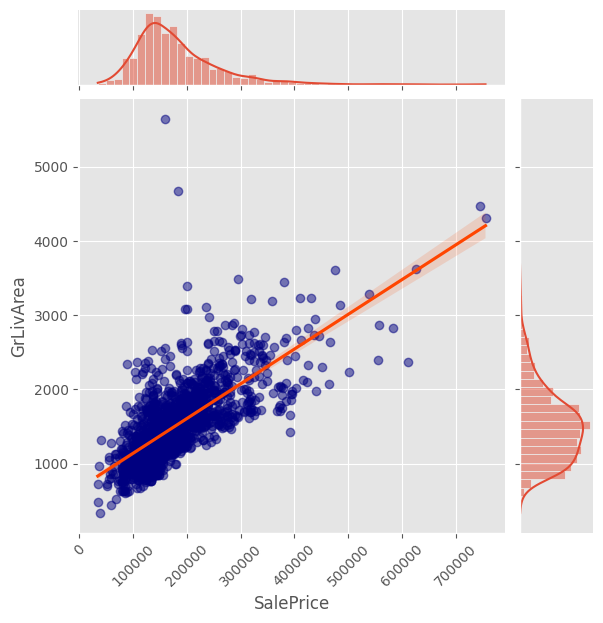

In [217]:
sns.jointplot(data=df, x='SalePrice', y='GrLivArea', kind='reg'
              ,scatter_kws = {"color": "navy", "alpha": 0.5},
            line_kws = {"color": "orangered"},)
plt.xticks(rotation=45)
;

Advanced

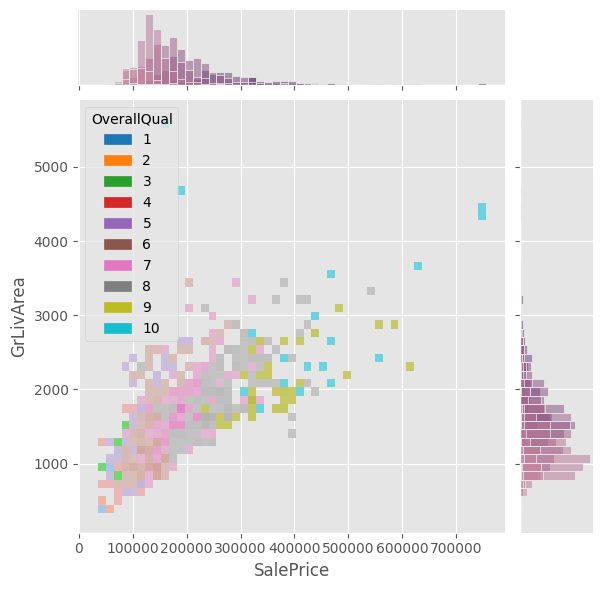

In [218]:
g = sns.jointplot(data=df, x='SalePrice', y='GrLivArea', kind="hist", hue='OverallQual', palette='tab10'
                  #, ratio=2
                  #, marginal_kws={'multiple': 'stack'}
                  )
sns.move_legend(g.ax_joint, loc='upper left') # optionally move the legend; seaborn >= 0.11.2 needed
plt.show()

''

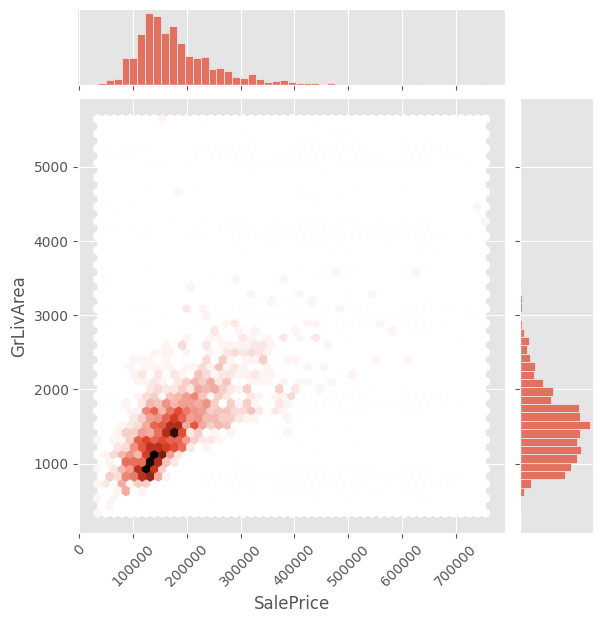

In [219]:
sns.jointplot(data=df, x='SalePrice', y='GrLivArea', kind='hex')
plt.xticks(rotation=45)
;

**Correlation Analysis and Heatmap**

- Pearson correlation measures the linear relationship between two **continuous** columns
- Pearson correlation coefficient value: range between -1 and 1
    - Close to +1: positive linear relationship
    - Close to -1: negative linear relationship
    - Close to 0: no linear relationship
- The easiest way to run correlation analysis is to use the `corr()` function pandas

In [220]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage       1.000000  0.100739     0.176561    -0.053457   0.036853   
LotArea           0.100739  1.000000     0.105806    -0.005636   0.014228   
OverallQual       0.176561  0.105806     1.000000    -0.091932   0.572323   
OverallCond      -0.053457 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt         0.036853  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd      0.078686  0.013788     0.550684     0.073741   0.592855   
MasVnrArea        0.105010  0.103321     0.407252    -0.125694   0.311600   
BsmtFinSF1        0.076670  0.214103     0.239666    -0.046231   0.249503   
BsmtFinSF2       -0.009312  0.111170    -0.059119     0.040229  -0.049107   
BsmtUnfSF         0.160829 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF       0.238274  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF          0.245181  0.299475     0.476224    -0.144203   0.281986   
2ndFlrSF          0.042549  0.050986     0.295493     0.028942   0.010308   
LowQualFinSF      0.049981  0.004779    -0.030429     0.025494  -0.183784   
GrLivArea         0.220347  0.263116     0.593007    -0.079686   0.199010   
BsmtFullBath      0.010514  0.158155     0.111098    -0.054942   0.187599   
BsmtHalfBath     -0.027856  0.048046    -0.040150     0.117821  -0.038162   
FullBath          0.120548  0.126031     0.550600    -0.194149   0.468271   
HalfBath         -0.012952  0.014259     0.273458    -0.060769   0.242656   
BedroomAbvGr      0.144494  0.119690     0.101676     0.012980  -0.070651   
KitchenAbvGr      0.034425 -0.017784    -0.183882    -0.087001  -0.174800   
TotRmsAbvGrd      0.221396  0.190015     0.427452    -0.057583   0.095589   
Fireplaces        0.044018  0.271364     0.396765    -0.023820   0.147716   
GarageYrBlt       0.044045 -0.024947     0.547766    -0.324297   0.825667   
GarageCars        0.165229  0.154871     0.600671    -0.185758   0.537850   
GarageArea        0.201473  0.180403     0.562022    -0.151521   0.478954   
WoodDeckSF       -0.016780  0.171698     0.238923    -0.003334   0.224880   
OpenPorchSF       0.069605  0.084774     0.308819    -0.032589   0.188686   
EnclosedPorch     0.027366 -0.018340    -0.113937     0.070356  -0.387268   
3SsnPorch         0.023499  0.020423     0.030371     0.025504   0.031355   
ScreenPorch       0.022969  0.043160     0.064886     0.054811  -0.050364   
PoolArea          0.114106  0.077672     0.065166    -0.001985   0.004950   
MiscVal          -0.059606  0.038068    -0.031406     0.068777  -0.034383   
YrSold           -0.012094 -0.014261    -0.027347     0.043950  -0.013618   
SalePrice         0.209624  0.263843     0.790982    -0.077856   0.522897   

               YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
LotFrontage        0.078686    0.105010    0.076670   -0.009312   0.160829   
LotArea            0.013788    0.103321    0.214103    0.111170  -0.002618   
OverallQual        0.550684    0.407252    0.239666   -0.059119   0.308159   
OverallCond        0.073741   -0.125694   -0.046231    0.040229  -0.136841   
YearBuilt          0.592855    0.311600    0.249503   -0.049107   0.149040   
YearRemodAdd       1.000000    0.176529    0.128451   -0.067759   0.181133   
MasVnrArea         0.176529    1.000000    0.261256   -0.071330   0.113862   
BsmtFinSF1         0.128451    0.261256    1.000000   -0.050117  -0.495251   
BsmtFinSF2        -0.067759   -0.071330   -0.050117    1.000000  -0.209294   
BsmtUnfSF          0.181133    0.113862   -0.495251   -0.209294   1.000000   
TotalBsmtSF        0.291066    0.360067    0.522396    0.104810   0.415360   
1stFlrSF           0.240379    0.339850    0.445863    0.097117   0.317987   
2ndFlrSF           0.140024    0.173800   -0.137079   -0.099260   0.004469   
LowQualFinSF      -0.062419   -0.068628   -0.064503    0.014807   0.028167   
GrLivArea          0.287389    0.388052    0.208171   -0.009640   0.2402

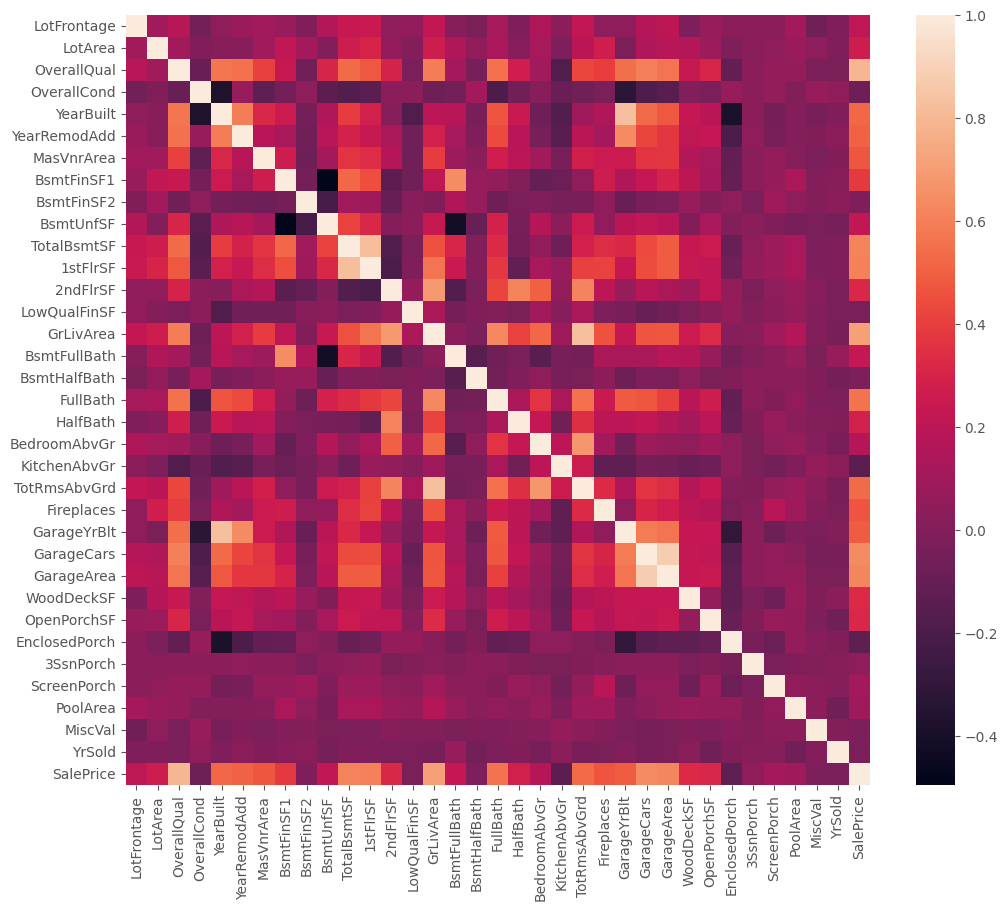

In [221]:
plt.figure(figsize=(12,10))

sns.heatmap(corr_matrix)
plt.grid(False)

**Observation**
- We can see that we have a mix of non-correlated columns, positively, negatively correlated columns
- The goal is to focus on the columns that are highly correlated (negative or positive) with our predicted value (SalePrice)
- There's a lot of noise. We can summarize the heatmap further by focusing on the columns that are highly correlated with SalePrice
- You can:
    - get sale price correlation shelf only and sort
    - OR build a similar matrix with a high correlation threshold 

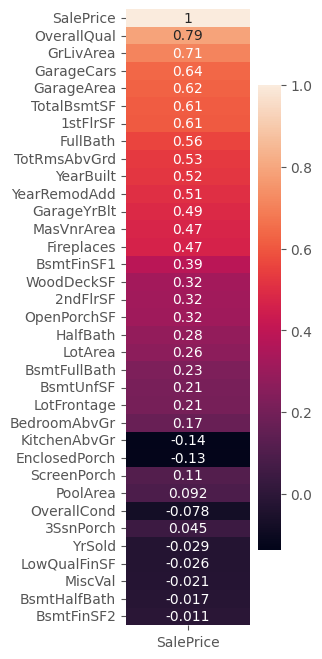

In [222]:
# method 1
plt.figure(figsize=(2,8))
corr_SalePrice = corr_matrix[['SalePrice']].sort_values(by='SalePrice',ascending=False, key=abs)
#corr_SalePrice
sns.heatmap(corr_SalePrice, annot=True)
plt.grid(False)

In [223]:
#method 2
# define a value to pick columns that are higher than 5% correlation (neg and pos) with SalePrice
threshold = .55

#build a corr matrix for SalePrice only
corr_SalePrice = corr_matrix['SalePrice']

#grab the columns that are highly correlated with Sale Price using abs value for both neg and pos
high_corr_cols = corr_SalePrice[abs(corr_SalePrice) > threshold].index

high_corr_cols

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath',
       'GarageCars', 'GarageArea', 'SalePrice'],
      dtype='object')

> Although it doesn't make sense to use categorical columns in correlation, "OverallQual" is an exception because it has more granular categories. And we know if price goes up, the overall qual goes up too 

<Axes: >

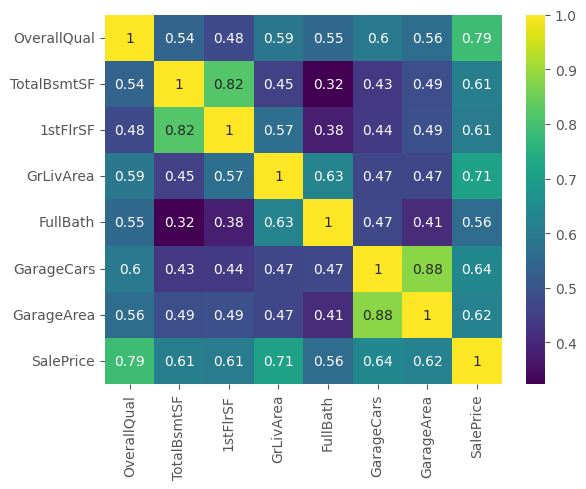

In [224]:
high_corr_matrix = df[high_corr_cols].corr()

sns.heatmap(high_corr_matrix, annot=True, cmap='viridis')

Observation:
- OverallQual is a categorical column (encoded to number), but has a wide range. Therefore, we can use its correlation score and it's the highest among all other scores.
- grlivingarea is second in high correlation to SalePrice
- Features that have high inner-correlation (multicollinearity) can be dropped (one of the 2 can be dropped) since they do not add much value.

Exclude categorical with num values

In [225]:
# Approach 2: Auto-filter (nunique > 5)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
true_numeric = [col for col in numeric_cols if df[col].nunique() > 5]
print(df[true_numeric].corr())


               LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
LotFrontage       1.000000  0.100739     0.176561    -0.053457   0.036853   
LotArea           0.100739  1.000000     0.105806    -0.005636   0.014228   
OverallQual       0.176561  0.105806     1.000000    -0.091932   0.572323   
OverallCond      -0.053457 -0.005636    -0.091932     1.000000  -0.375983   
YearBuilt         0.036853  0.014228     0.572323    -0.375983   1.000000   
YearRemodAdd      0.078686  0.013788     0.550684     0.073741   0.592855   
MasVnrArea        0.105010  0.103321     0.407252    -0.125694   0.311600   
BsmtFinSF1        0.076670  0.214103     0.239666    -0.046231   0.249503   
BsmtFinSF2       -0.009312  0.111170    -0.059119     0.040229  -0.049107   
BsmtUnfSF         0.160829 -0.002618     0.308159    -0.136841   0.149040   
TotalBsmtSF       0.238274  0.260833     0.537808    -0.171098   0.391452   
1stFlrSF          0.245181  0.299475     0.476224    -0.144203   0.281986   

Applying a mask

In [226]:
final_matrix = df[high_corr_cols].corr()
final_matrix

OverallQual  TotalBsmtSF  1stFlrSF  GrLivArea  FullBath  \
OverallQual     1.000000     0.537808  0.476224   0.593007  0.550600   
TotalBsmtSF     0.537808     1.000000  0.819530   0.454868  0.323722   
1stFlrSF        0.476224     0.819530  1.000000   0.566024  0.380637   
GrLivArea       0.593007     0.454868  0.566024   1.000000  0.630012   
FullBath        0.550600     0.323722  0.380637   0.630012  1.000000   
GarageCars      0.600671     0.434585  0.439317   0.467247  0.469672   
GarageArea      0.562022     0.486665  0.489782   0.468997  0.405656   
SalePrice       0.790982     0.613581  0.605852   0.708624  0.560664   

             GarageCars  GarageArea  SalePrice  
OverallQual    0.600671    0.562022   0.790982  
TotalBsmtSF    0.434585    0.486665   0.613581  
1stFlrSF       0.439317    0.489782   0.605852  
GrLivArea      0.467247    0.468997   0.708624  
FullBath       0.469672    0.405656   0.560664  
GarageCars     1.000000    0.882475   0.640409  
GarageArea     0.882475    1.000000   0.623431  
SalePrice      0.640409    0.623431   1.000000

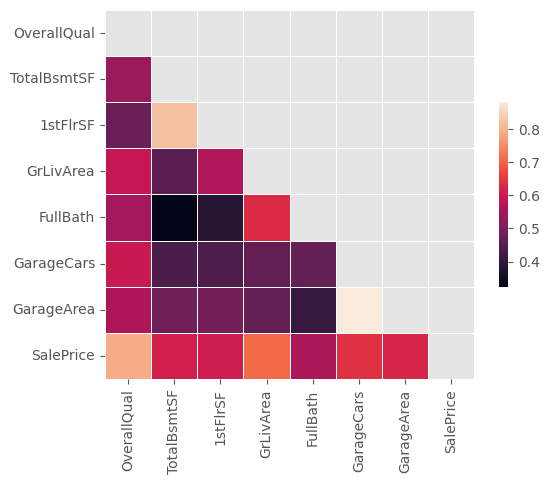

In [227]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(final_matrix, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(final_matrix, mask=mask,  
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.grid(False)

##### Correlation and Distribution Analysis Using `pairplots()`

- Another comprehensive visual in seaborn is `pairplot` which shows the following:
    - Correlation Matrix
    - Scatterplot between 2 columns
    - Histograms when the column matches itself
- Let's use the highly correlated column in our `pairplot` analysis

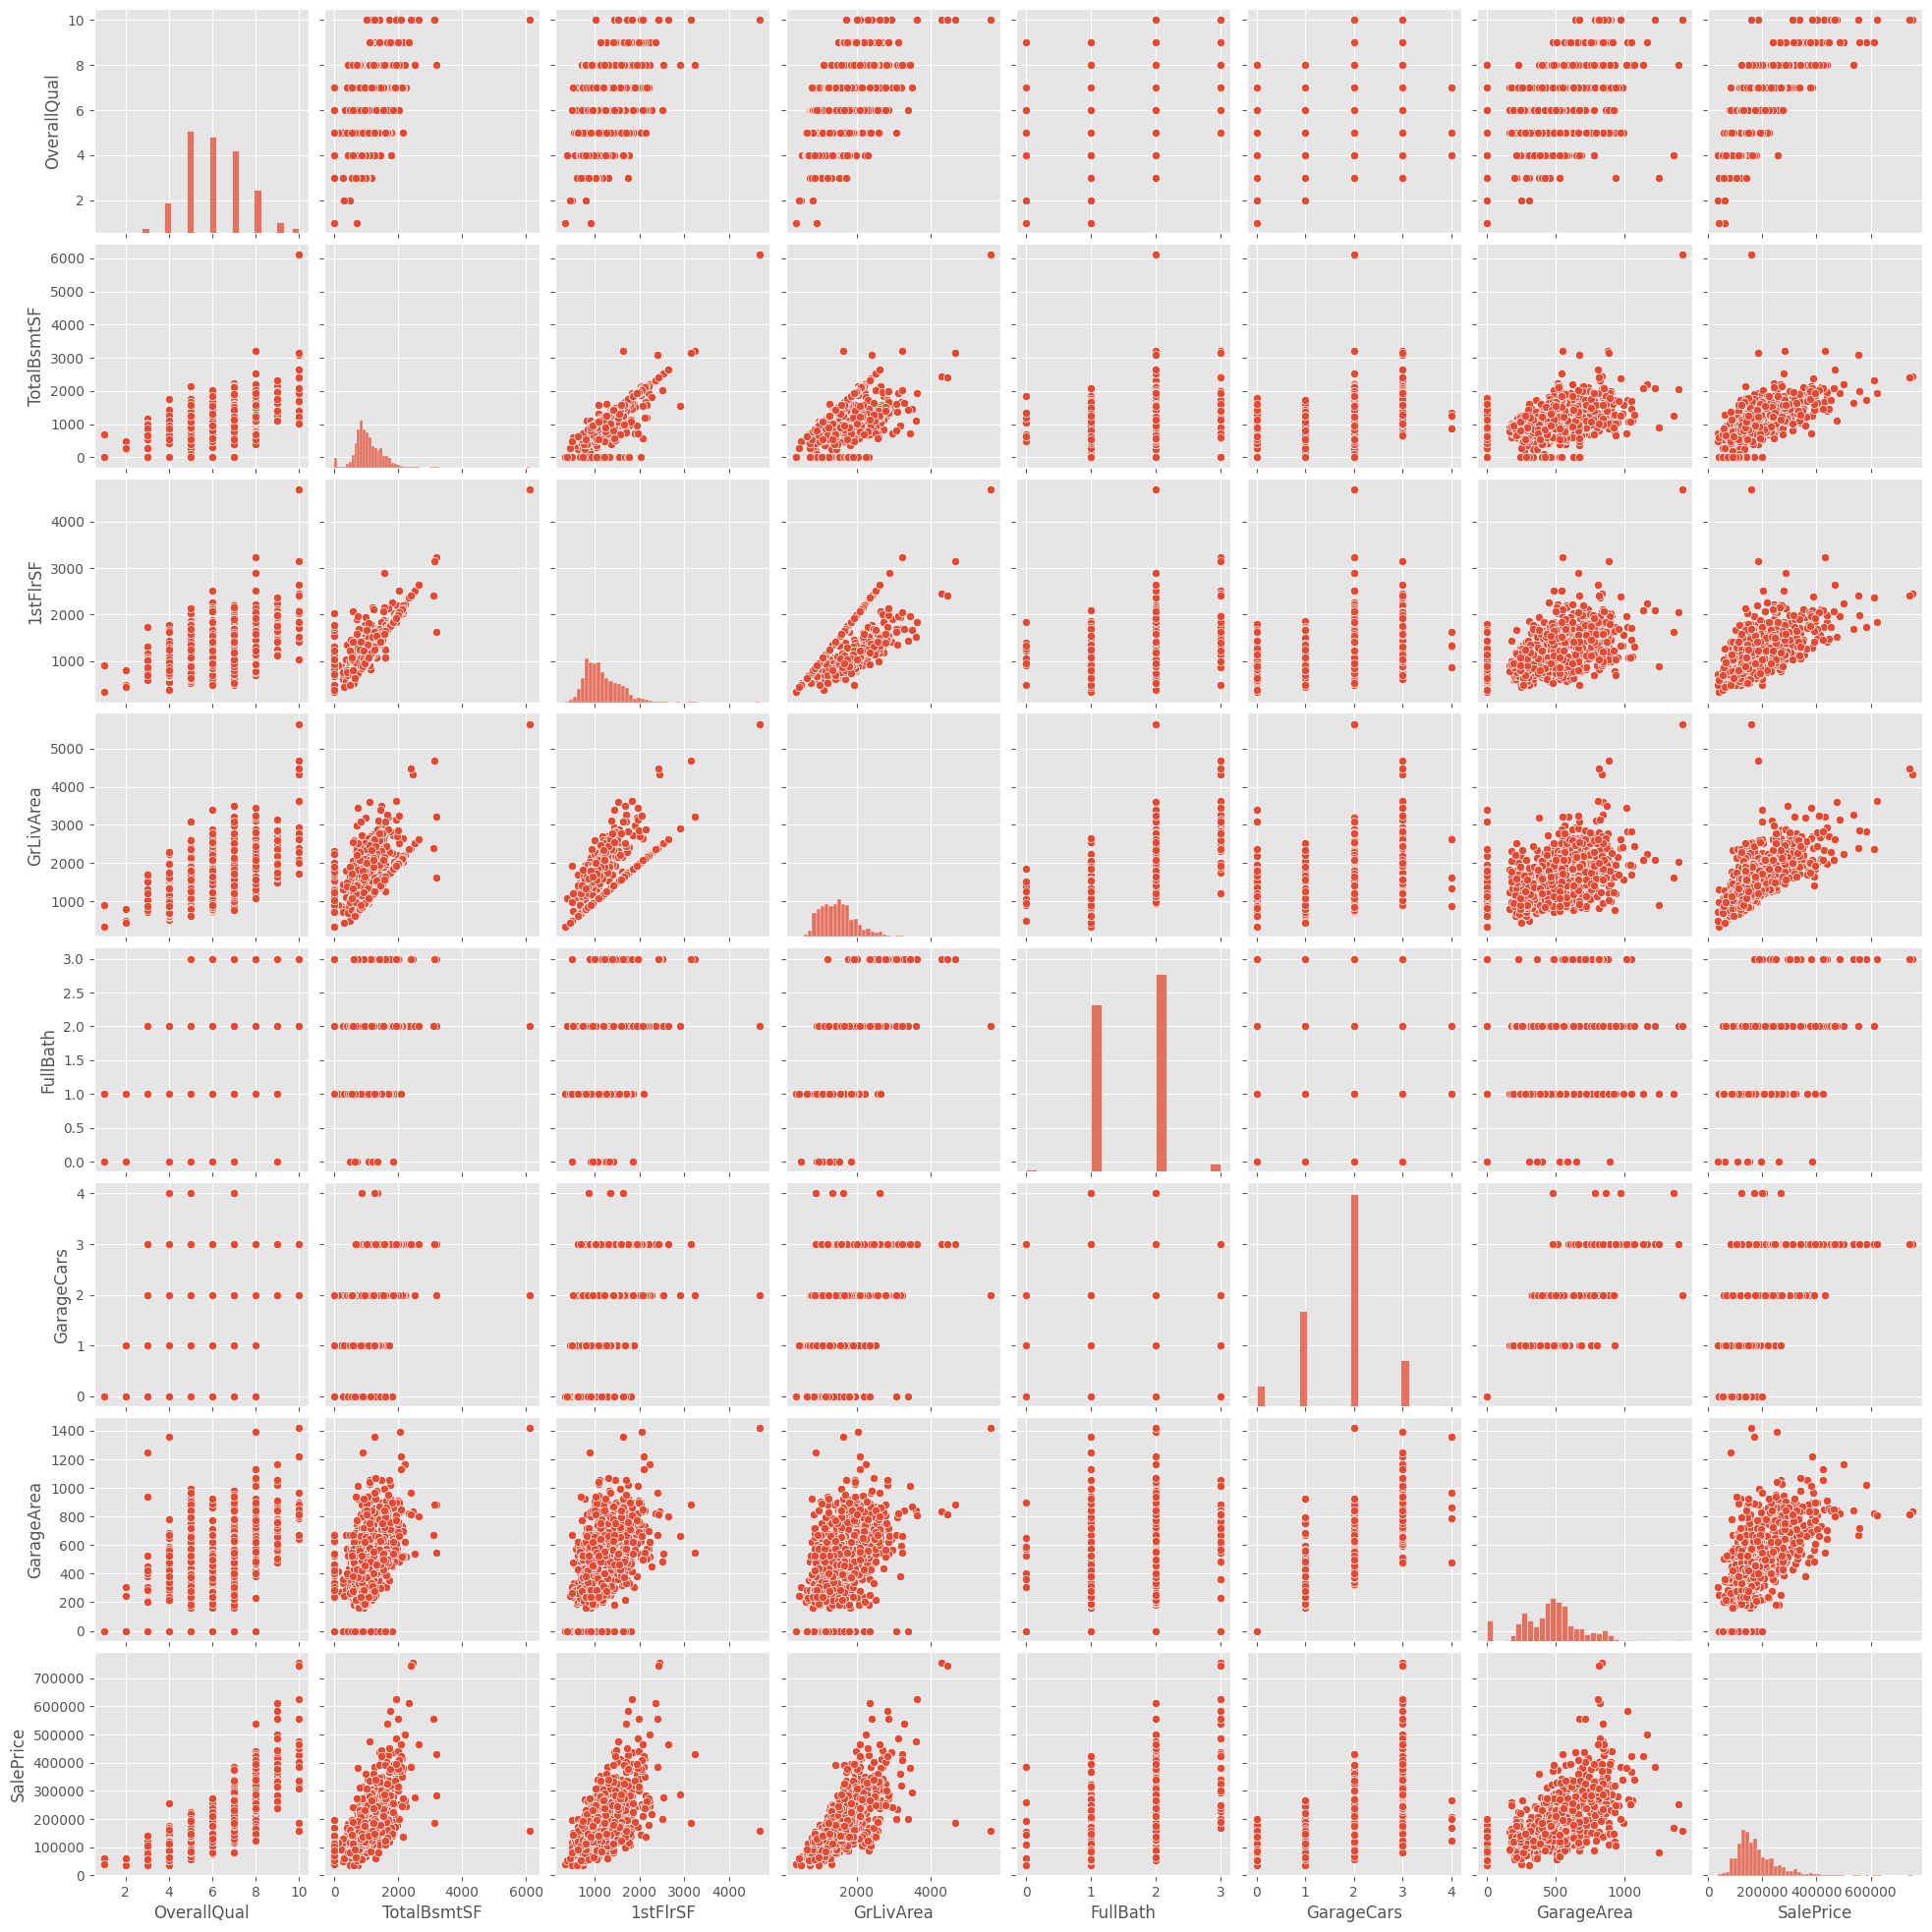

In [228]:
sns.pairplot(df[high_corr_cols])

**Add a categorical col to pairplot**

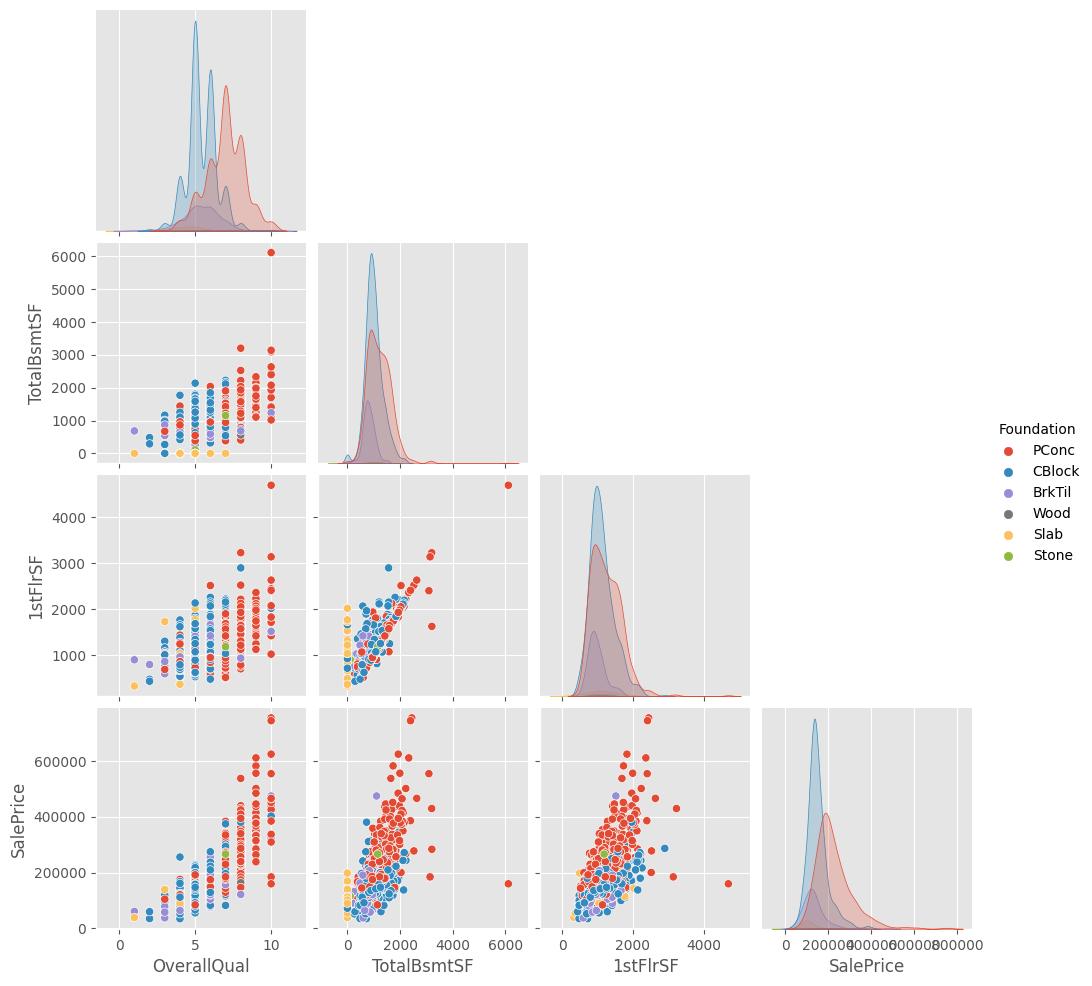

In [ ]:
high_corr_cols_2 = ['OverallQual', 'TotalBsmtSF', '1stFlrSF','SalePrice', 'Foundation']

sns.pairplot(df[high_corr_cols_2], hue='Foundation', corner=True)

#### Numeric vs Categorical

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

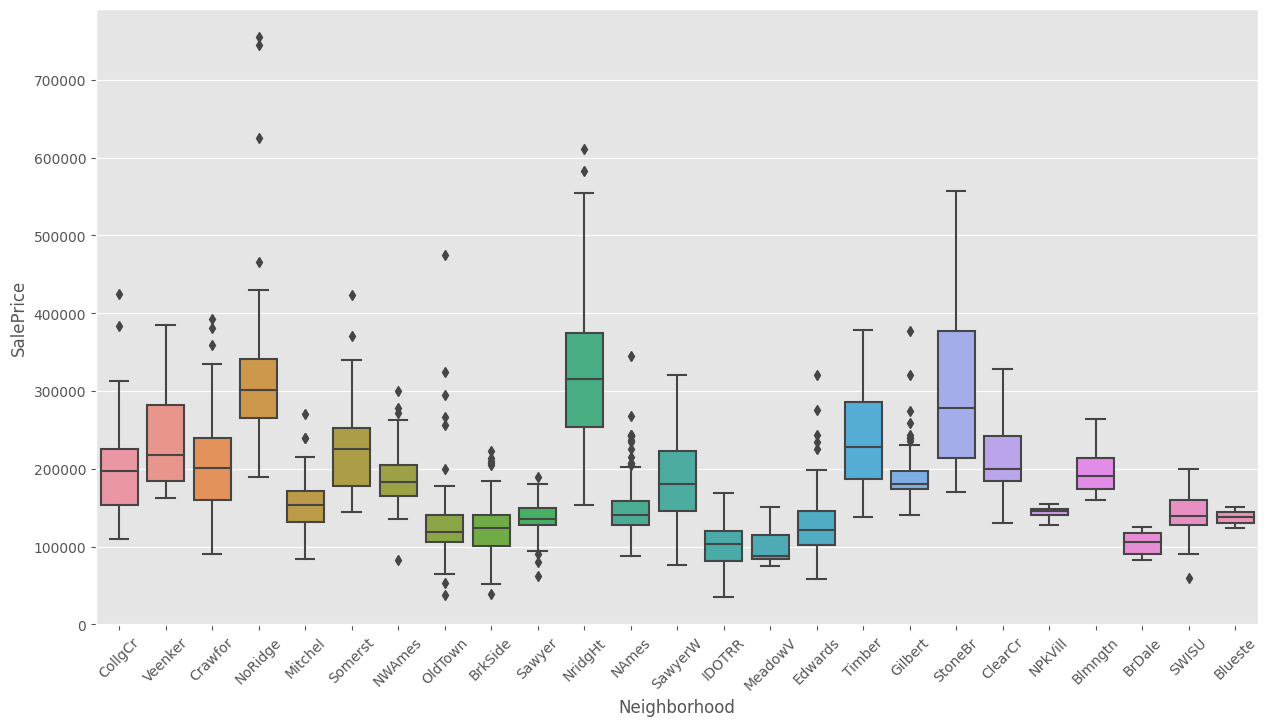

In [ ]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data=df, x='Neighborhood', y='SalePrice')

The chart above helps us understand:
- Which Neighborhood has the highest median and max
- Which Neighborhood has the highest dispersion/spread
- Which Neighborhood has the highest count of outliers
- Skewness of each neighborhood (e.g. NoRidge looks symmetric - normally distributed)

**Observation**
- We can conclude that the distribution of sale price changes with individual neighborhoods
- NoRidge has the biggest outliers
- Most is below 400,000 dollar and above 100,000 salesprice 
- Except for 2 or 3, most neighborhoods have a median between 100 to 200k
- NridgeHt and StoneBr have very high ranges and a heavy positive skew, but seemingly no outliers.

#### Swarmplots

In [ ]:
# top 5 by value counts
df['Neighborhood'].value_counts().head()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

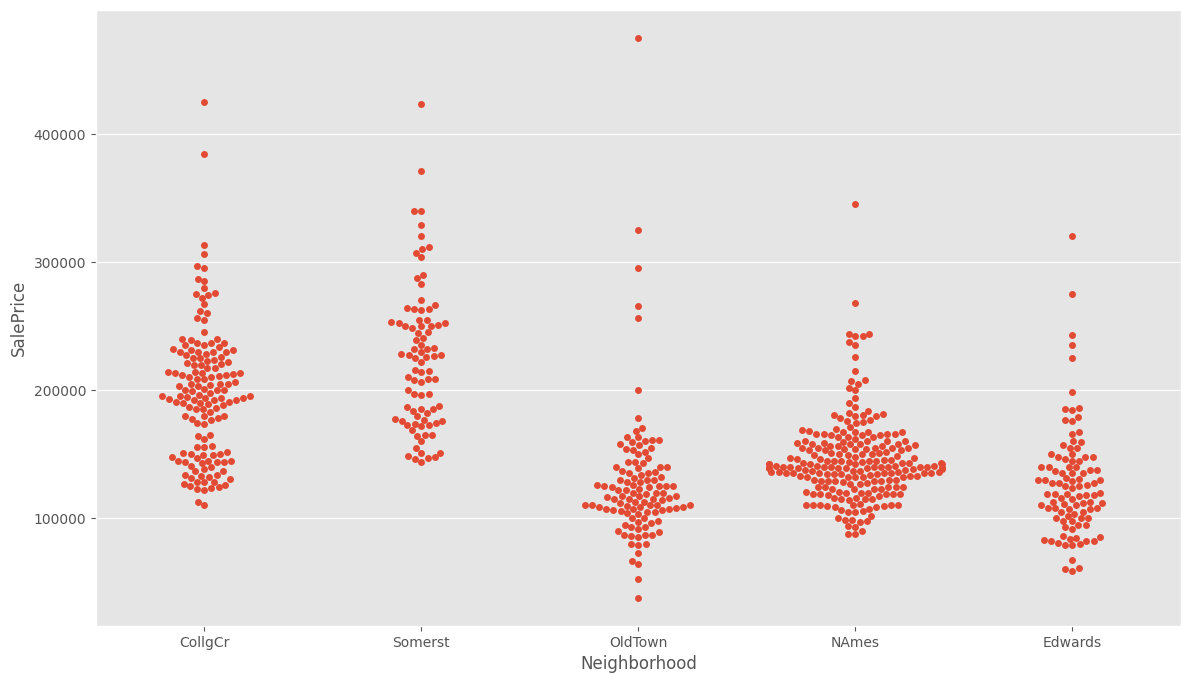

In [229]:


#focus on smaller group of categories
df_top5_neighborhoods = df[df['Neighborhood'].isin(df['Neighborhood'].value_counts().head().index)]
plt.figure(figsize=(14,8))

sns.swarmplot(data=df_top5_neighborhoods, x='Neighborhood', y='SalePrice')


<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

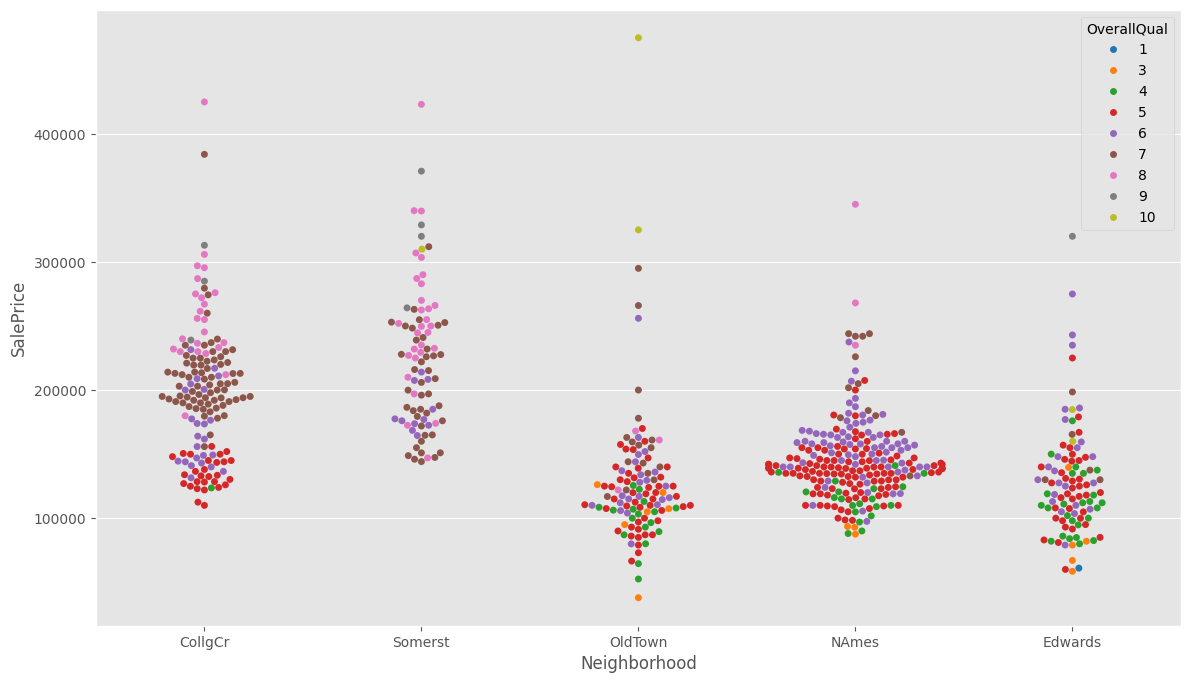

In [230]:
plt.figure(figsize=(14,8))

sns.swarmplot(data=df_top5_neighborhoods, x='Neighborhood', y='SalePrice', hue='OverallQual', palette='tab10')

- CollgCr has 2 separate chunks on the Price level.
- Somerst has consistent high quality: (a) no red or green dots (low quality) and (b) consistent range between 6 and 8 (good quality) 
- NAmes has mid range or economical houses
- OldTown and Edwards have some of the lowest valued housing

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


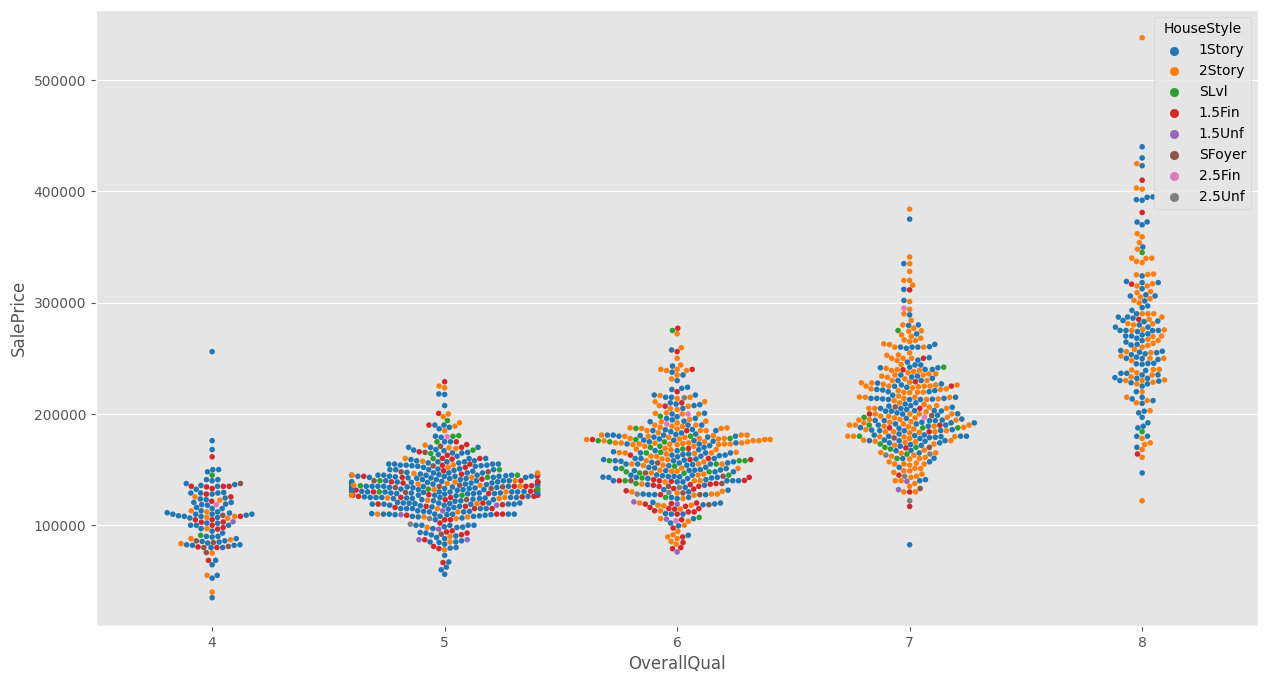

In [ ]:
plt.figure(figsize=(15,8))
#focus on smaller group of categories
df_spec_qual = df[df['OverallQual'].isin([4,5,6,7,8 ])]
sns.swarmplot(data=df_spec_qual, x='OverallQual', y='SalePrice', size=4
              , hue='HouseStyle' #breakdown the points by color (second category)
              , palette='tab10' #Tableau's color palette
              )

**Observations**
- The widest width of the swarms represents the highest frequency of data points
- Quality = 5 has normal distribution (symmetrical)
- quality = 7 seems to be skewed
- Quality = 8 has the negative highest kurtosis
- we can see that 1-story houses are the majority for quality of 4 and 5
- However, a quality of 6 and up starts to have more 2Story houses

Another method of doing distribution comparison is to blend in histograms of each qual level

### Distribution

<Axes: xlabel='SalePrice', ylabel='Count'>

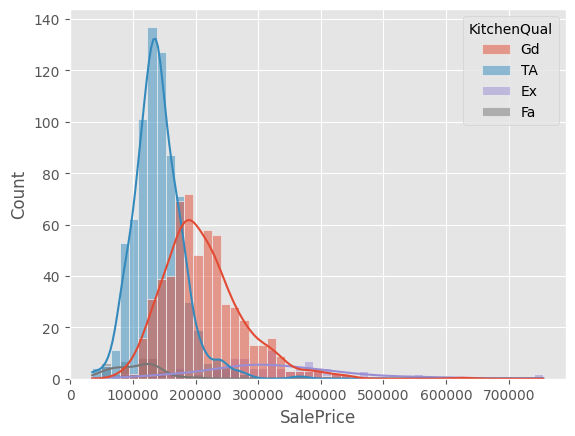

In [232]:
sns.histplot(data=df, x='SalePrice', hue='KitchenQual', kde=True)

<Axes: xlabel='SalePrice', ylabel='Count'>

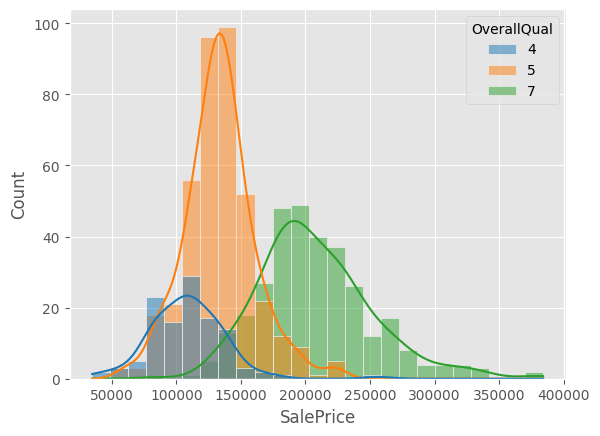

In [233]:
df_spec_qual = df[df['OverallQual'].isin([4,5,7 ])]
sns.histplot(data=df_spec_qual, x='SalePrice', hue='OverallQual',palette='tab10', kde=True)

#### Violin Plots

A **violin plot** is a hybrid visualization that combines the features of a **box plot** and a **kernel density estimate (KDE)** to show the distribution of numerical data across categories. It provides deeper insights into the **shape, spread, and density** of the data compared to a standard box plot.

**Key Components of a Violin Plot**
 
- **Shape**: The width of the violin represents the **data density** (wider = more data points).
- **Median/Quartiles**: Often includes a **white dot (median)** and **thick bar (IQR)** like a box plot.
- **Tails**: Shows the full range of the data (unlike a box plot, which truncates at 1.5×IQR).


![VP](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.5_Exploratory_Data_Analysis/Trainer_PPT_and_IPYNB/VP.png)


<Axes: xlabel='Neighborhood', ylabel='SalePrice'>

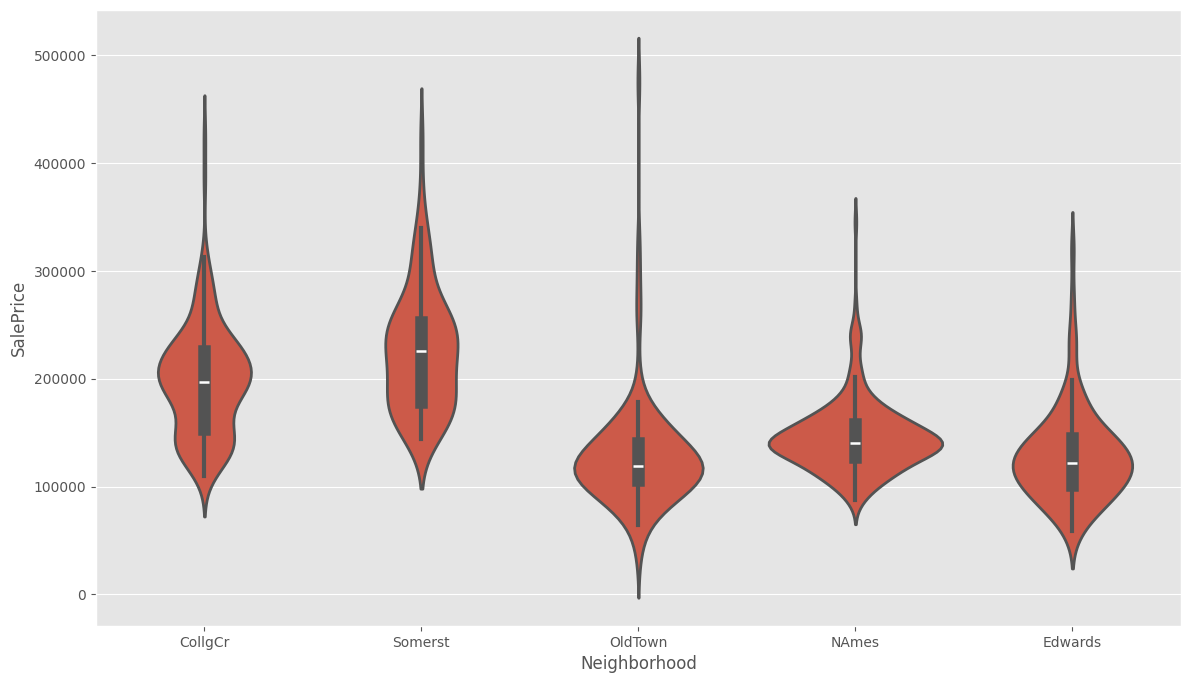

In [234]:
plt.figure(figsize=(14,8))

sns.violinplot(data=df_top5_neighborhoods, x='Neighborhood', y='SalePrice', linewidth=2)

<Axes: xlabel='SalePrice', ylabel='ExterCond'>

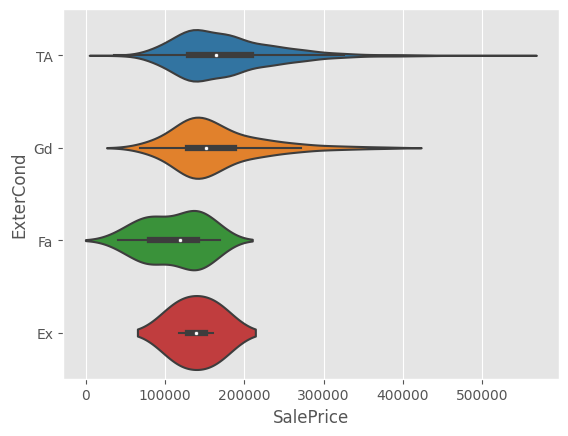

In [ ]:
sns.violinplot(data=df_spec_qual, y='ExterCond', x='SalePrice', palette='tab10')

customization

In [ ]:
plt.figure(figsize=(14,8))
sns.violinplot(data=df_Neigh_Focus, x='Neighborhood', y='SalePrice', split=True, fill=False)

#### Stacked Bar Chart

In [253]:
ct_kq_neighb = pd.crosstab(index=df['Neighborhood'], columns=df['KitchenQual'])
ct_kq_neighb

KitchenQual   Ex  Fa   Gd   TA
Neighborhood                  
Blmngtn        1   0   16    0
Blueste        0   0    0    2
BrDale         0   0    1   15
BrkSide        1  10    7   40
ClearCr        2   0   12   14
CollgCr        7   0  115   28
Crawfor        2   3   23   23
Edwards        5   7   15   73
Gilbert        1   0   44   34
IDOTRR         0   6    5   26
MeadowV        1   0    1   15
Mitchel        0   0   10   39
NAmes          4   3   41  177
NPkVill        0   0    1    8
NWAmes         2   0   24   47
NoRidge        4   0   35    2
NridgHt       39   0   38    0
OldTown        5   4   23   81
SWISU          0   5    7   13
Sawyer         0   1   11   62
SawyerW        0   0   41   18
Somerst       10   0   72    4
StoneBr        9   0   16    0
Timber         5   0   23   10
Veenker        2   0    5    4

<Axes: xlabel='Neighborhood'>

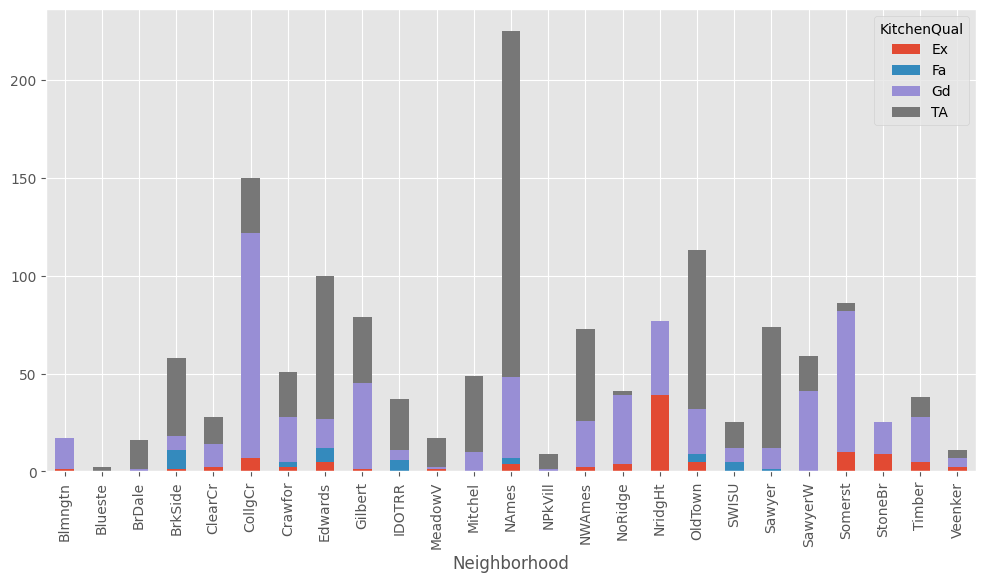

In [254]:
ct_kq_neighb.plot(kind='bar', figsize=(12,6), stacked=True)

Observations
- contribution of each overall qualscore count for each neighborhood along with the total. in other words, You can see distribution of those various quality scores across neighborhoods.
- NAmes has the most houses, and the most 5 & 6 quality
- Not many neighborhoods have highest quality houses  (8 to 9). we have mainly NridgeHt, Somerst, and StoneBr.
- CollgCr has a good distribution for the high quality scores from 5 to 9 scores

> The problem with the plot above is that it is fixed and it's hard sometimes to get a measurement of the stacked bars. It is recommended to use an interactive graphing library like plotly


In [ ]:
ct_kq_neighb_norm = pd.crosstab(index=df['Neighborhood'], columns=df['KitchenQual'], normalize='index').round(2)
ct_kq_neighb_norm

KitchenQual     Ex    Fa    Gd    TA
Neighborhood                        
Blmngtn       0.06  0.00  0.94  0.00
Blueste       0.00  0.00  0.00  1.00
BrDale        0.00  0.00  0.06  0.94
BrkSide       0.02  0.17  0.12  0.69
ClearCr       0.07  0.00  0.43  0.50
CollgCr       0.05  0.00  0.77  0.19
Crawfor       0.04  0.06  0.45  0.45
Edwards       0.05  0.07  0.15  0.73
Gilbert       0.01  0.00  0.56  0.43
IDOTRR        0.00  0.16  0.14  0.70
MeadowV       0.06  0.00  0.06  0.88
Mitchel       0.00  0.00  0.20  0.80
NAmes         0.02  0.01  0.18  0.79
NPkVill       0.00  0.00  0.11  0.89
NWAmes        0.03  0.00  0.33  0.64
NoRidge       0.10  0.00  0.85  0.05
NridgHt       0.51  0.00  0.49  0.00
OldTown       0.04  0.04  0.20  0.72
SWISU         0.00  0.20  0.28  0.52
Sawyer        0.00  0.01  0.15  0.84
SawyerW       0.00  0.00  0.69  0.31
Somerst       0.12  0.00  0.84  0.05
StoneBr       0.36  0.00  0.64  0.00
Timber        0.13  0.00  0.61  0.26
Veenker       0.18  0.00  0.45  0.36

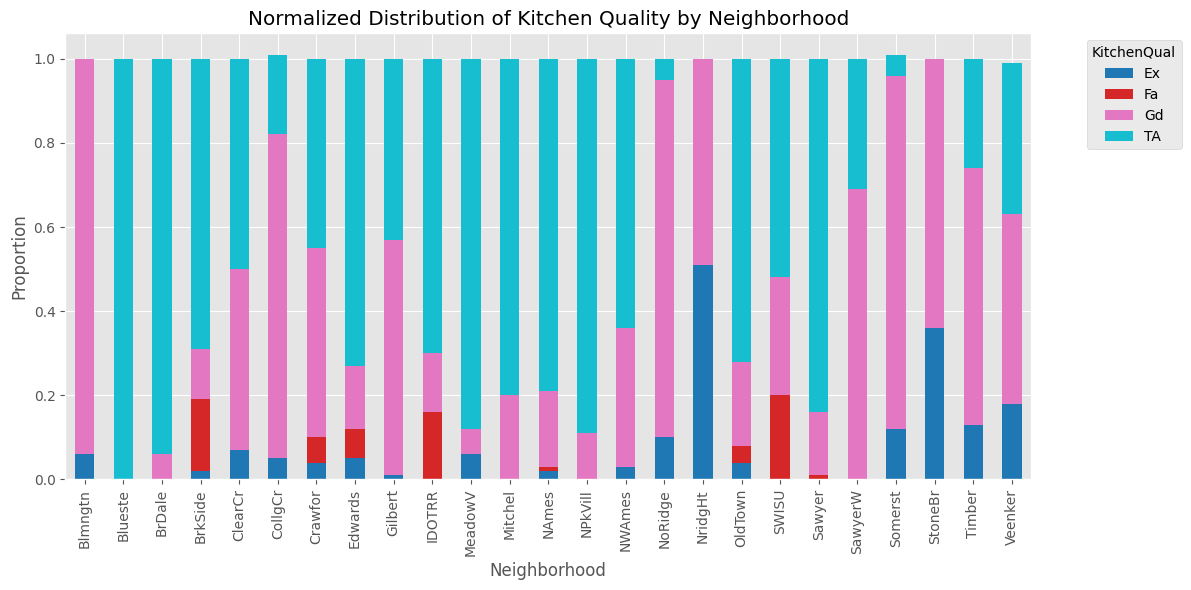

In [ ]:
ct_kq_neighb_norm.plot(kind='bar', figsize=(12,6), stacked=True, colormap='tab10')
plt.title('Normalized Distribution of Kitchen Quality by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Proportion')
#avoid having the legend to overlap
plt.legend(title='KitchenQual', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

**Note** Seaborn doesn’t directly support stacked bar charts. You’d have to reshape the DataFrame and use hue, which is more cumbersome.

#### Intro to Plotly
The main website has a lot of good examples https://plotly.com/python/


`pip install plotly`

if you get an error or the plot doesn't show, you need to `pip install nbformat`

Plotly has 2 main graphing libraries with different features

In [257]:
import plotly

plotly.__version__

'5.14.1'

In [258]:
import plotly.express as px
import plotly.graph_objects as go

In [260]:
fig = px.bar(data_frame=ct_kq_neighb,
                color='KitchenQual',
                title='Kitchen Quality Across Different Neighborhoods',
                text_auto=True)
fig.show()

In [ ]:
fig = px.bar(data_frame=ct_kq_neighb_norm,
                color='KitchenQual',
                title='Kitchen Quality Across Different Neighborhoods',
                )
fig.show()

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

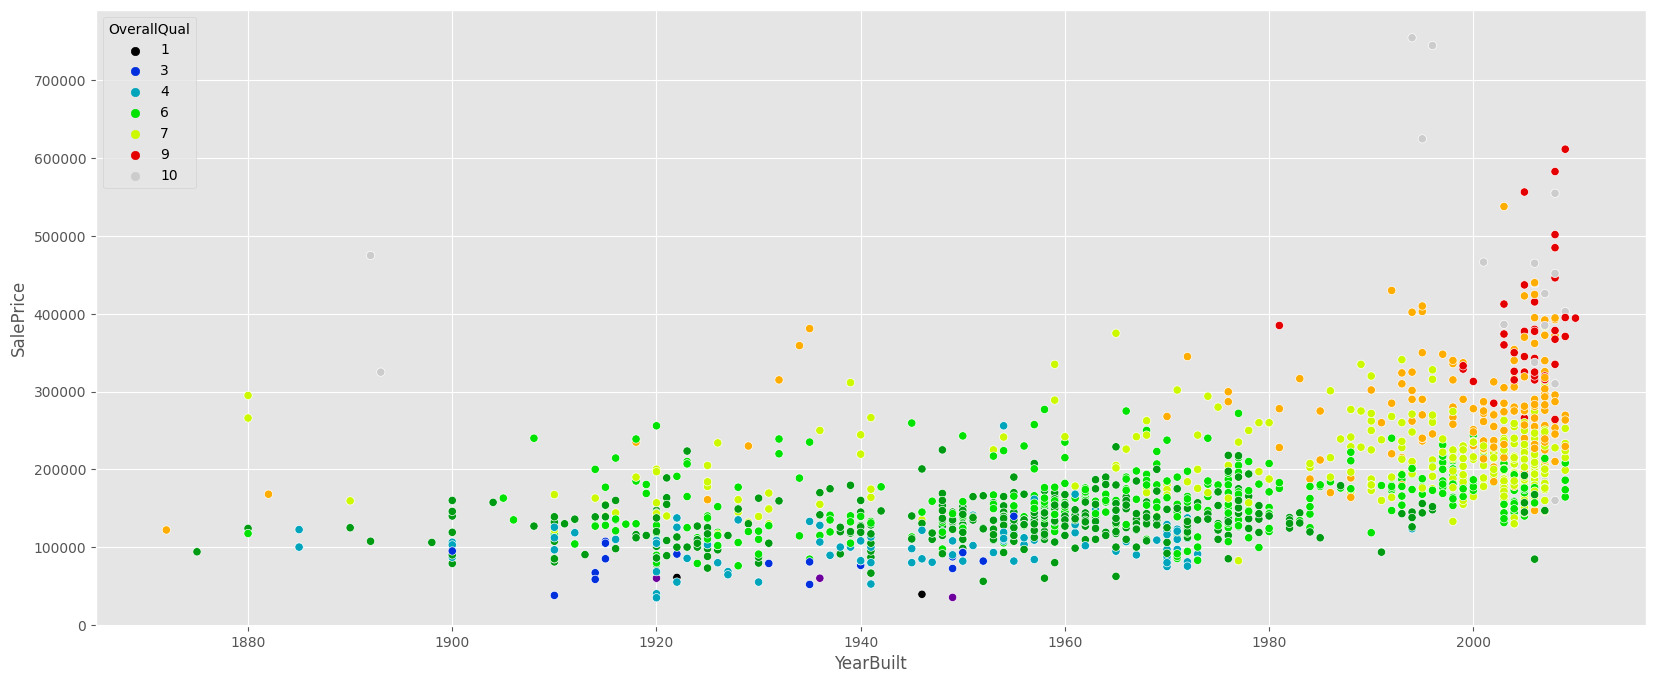

In [ ]:
plt.figure(figsize=(20,8))
sns.scatterplot(x=df['YearBuilt'], y=df['SalePrice'], hue=df['OverallQual'], palette='nipy_spectral')

In [ ]:
fig = px.scatter(data_frame=df,
                 x='YearBuilt',
                 y='SalePrice',
                 color='OverallQual')

fig.show()

### Pie Chart and Sunburst

In [ ]:
fig = px.pie(data_frame=df, values='SalePrice', names='KitchenQual')
fig.show()

Building Sunbursts
- Pie charts with additional detail about the hierarchy of multiple components.
- For example, each neighborhood (high level - L1) can have multiple houses with different building types (L2) and quality categories (L3)

In [ ]:
fig = px.sunburst(data_frame=df_top5_neighborhoods
                , path=['Neighborhood', 'BldgType', 'OverallQual']
                , values='SalePrice'
                , width=900
                , height=900
                )
fig.show()